In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
import random

In [2]:
df = pd.read_csv('agent_1_data.csv')

In [3]:
c = []
x_train = []
for i in range(len(df)):
    arr = np.fromstring(df['x'][i].replace('[', '').replace(']', ''), dtype=int, sep='\n').reshape(3,3)
    arr = arr/arr.max()
    c.append(np.asarray(arr))
x_train = np.asarray(c)
x_train = np.asarray(x_train)
x_train.shape

(29162, 3, 3)

In [4]:
out = []
for i in range(len(df)):
    a = df['y'][i].replace('[', '').replace(']', '').replace(',','').split()
    a = [int(m) for m in a]
    out.append(np.asarray(a))
y_train = out
y_train = np.asarray(out)
y_train

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [7]:
y_train.shape

(29162, 4)

In [8]:
digit_input = tf.keras.layers.Input( shape = (3,3,1) )
cnn_1 = tf.keras.layers.Conv2D( filters = 64, kernel_size = (3,3), strides = (1,1),
                                padding = "valid", activation = tf.nn.relu )( digit_input )
flatten_image = tf.keras.layers.Flatten()( cnn_1 )
# dropout_1 = tf.keras.layers.Dropout( rate = 0.5 )( flatten_image )
dense_1 = tf.keras.layers.Dense( units = 128, activation = tf.nn.relu )( flatten_image )
dense_2 = tf.keras.layers.Dense( units = 128, activation = None )( dense_1 )
probabilities = tf.keras.layers.Dense( units = 4, activation =  tf.nn.softmax)( dense_2 )

In [10]:
model = tf.keras.Model( inputs = digit_input, outputs = probabilities )
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [11]:
x_train = np.reshape( x_train, (-1, 3, 3, 1) )

x_test = np.reshape( x_test, (-1, 3, 3, 1) )
history = model.fit( x_train, y_train, epochs = 20 )

Epoch 1/20
912/912 [==============================] - 2s 2ms/step - loss: 0.6593 - accuracy: 0.7458
Epoch 2/20
912/912 [==============================] - 1s 2ms/step - loss: 0.2301 - accuracy: 0.9217
Epoch 3/20
912/912 [==============================] - 1s 2ms/step - loss: 0.1867 - accuracy: 0.9357
Epoch 4/20
912/912 [==============================] - 1s 1ms/step - loss: 0.1765 - accuracy: 0.9367
Epoch 5/20
912/912 [==============================] - 1s 1ms/step - loss: 0.1656 - accuracy: 0.9368
Epoch 6/20
912/912 [==============================] - 1s 1ms/step - loss: 0.1627 - accuracy: 0.9375
Epoch 7/20
912/912 [==============================] - 1s 1ms/step - loss: 0.1586 - accuracy: 0.9394
Epoch 8/20
912/912 [==============================] - 1s 1ms/step - loss: 0.1548 - accuracy: 0.9391
Epoch 9/20
912/912 [==============================] - 1s 1ms/step - loss: 0.1517 - accuracy: 0.9409
Epoch 10/20
912/912 [==============================] - 1s 1ms/step - loss: 0.1521 - accuracy: 0.9401

In [29]:
x_test = [[3, 3, 3],
       [3, 3, 3],
       [1, 4, 3]]
x_test = np.asarray(x_test)

y_test = np.asarray([0, 0, 0, 1])

array([1, 0, 0, 0])

In [13]:
# calculate the validation loss
val_loss, val_accuracy = model.evaluate(x_test, np.asarray(y_test))
print(val_loss, val_accuracy)

912/912 [==============================] - 1s 1ms/step - loss: 0.1465 - accuracy: 0.9447
0.14652933180332184 0.944722592830658


In [14]:
model.save('epic_num_reader2.model')

INFO:tensorflow:Assets written to: epic_num_reader2.model\assets


In [15]:
new_model = tf.keras.models.load_model('epic_num_reader2.model')

In [16]:
def get_children(x, y, n, visited_list):
    """
    This function is used to return children of a particular node
    x: row value of current node
    y: column value of current node
    n: size of maze
    gofn: g(n) value of current node
    visited_list: list of nodes that are already visited
    matrix: maze
    agent_matrix: matrix of the agent that holds the information of updated environment
    """
    allChildren = [(x+1,y),#down
                   (x-1,y),#up
                   (x,y+1),#right
                   (x,y-1)]#left
    if x+1 > n-1:
        allChildren.remove((x+1,y))
    if x-1 < 0:
        allChildren.remove((x-1,y))
    if y+1 > n-1:
        allChildren.remove((x,y+1))
    if y-1 < 0:
        allChildren.remove((x,y-1))

    return allChildren

In [17]:
def populateMatrix(n,p):
    """
    This function returns randomly populated maze
    p: probabillity density of each cell
    n: size of the maze
    """
    global block_unblock_matrix
    np_array = np.random.rand(n*n)
    block = lambda x: 0 if x>=p else 1
    vectorized_block = np.vectorize(block)
    np_array = vectorized_block(np_array).reshape(n,n)
    np_array[0,0]=0
    np_array[n-1,n-1] =0
    block_unblock_matrix = np.asmatrix(np_array)

    ############testing on hard coded matrix ###########
#     block_unblock_matrix = [[0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0],
#             [0, 1, 0, 0, 0],
#             [1, 0, 0, 1, 0]]
#     ######################################
    block_unblock_matrix = np.matrix(block_unblock_matrix)
    plt.spy(block_unblock_matrix)
    return block_unblock_matrix


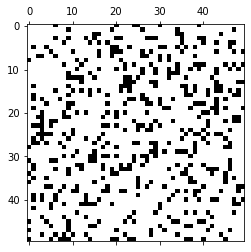

In [18]:
maze_size = 50
agent_grid_world = np.full((maze_size, maze_size),3)
agent_grid_world = np.asmatrix(agent_grid_world)
full_grid_world = populateMatrix(maze_size, 0.2)
plt.spy(full_grid_world)

In [19]:
def next_move(current_node, predictions, full_grid_world, visited_list, maze_size, trajectory, flag, agent_grid_world):
    """
    Based on prediction made by the Neural Network, this function decides the next move of the agent
    current_node: The node that the agent is currently present in
    predictions: The output given by Neural Network
    full_grid_world: The actual maze/gridworld
    visited_list: list of nodes that have been visited by the agent
    maze_size: Size of the gridworld
    trajectory: The path that agent took to reach the goal
    flag: status to check if the current node is blocked or not
    agent_grid_world: The agent-discovered portion of the full grid world
    """
    message = ''
    indices = zip(np.where(predictions[0] == predictions[0].max()))

    for row in indices:
        print(row)
        if row[0][0] == 0:
            message = 'up'
            next_node = (current_node[0] - 1, current_node[1])
        elif row[0][0] == 1:
            message = 'down'
            next_node = (current_node[0] + 1, current_node[1])
        elif row[0][0] == 2:
            message = 'left'
            next_node = (current_node[0], current_node[1] - 1)
        elif row[0][0] == 3:
            message = 'right'
            next_node = (current_node[0], current_node[1] + 1)
    
    try:
        if agent_grid_world[next_node] == 2 or next_node[0] > maze_size-1 or next_node[1] > maze_size-1 or next_node in visited_list:
            children = get_children(current_node[0], current_node[1], maze_size, visited_list)
            i = random.randint(0,len(children)-1)
            if (next_node[0], next_node[1]) == (current_node[0] - 1, current_node[1]):
                message = 'up'
            elif (next_node[0], next_node[1]) == (current_node[0] + 1, current_node[1]):
                message = 'down'
            elif (next_node[0], next_node[1]) == (current_node[0] - 1, current_node[1]):
                message = 'left'
            elif (next_node[0], next_node[1]) == (current_node[0] + 1, current_node[1]):
                message = 'right'

            return children[i], message
    except Exception as err:
        children = get_children(current_node[0], current_node[1], maze_size, visited_list)
        i = random.randint(0,len(children)-1)
    
        if (children[0], children[1]) == (current_node[0] - 1, current_node[1]):
                message = 'up'
        elif (children[0], children[1]) == (current_node[0] + 1, current_node[1]):
            message = 'down'
        elif (children[0], children[1]) == (current_node[0] - 1, current_node[1]):
            message = 'left'
        elif (children[0], children[1]) == (current_node[0] + 1, current_node[1]):
            message = 'right'

        return children[i], message
    
    return next_node, message

In [20]:
def get_neighbors(row, col, n):
    """
    Returns the immediate neighbors of the node (row, col)
    n: Maze size
    """
    dir = [[-1, -1], [-1, 0],[-1, 1], [0, -1], [0, 0],  [0, 1], [1, -1], [1, 0], [1, 1]]
    friend = []
    count = 0
    for x, y in dir:
        row_new = row + x
        col_new = col + y
        if (row_new>=0 and row_new<=(n-1)) and (col_new>=0 and col_new<=(n-1)):
            count += 1
            friend.append((row_new, col_new))
    return count, friend

In [21]:
def get_window(current_node, agent_grid_world, full_grid_world):
    """
    Since we use the local information, this function returns the local 3x3 grid surrounding the agent.
    current_node: The node that the agent is currently present in
    agent_grid_world: The agent-discovered portion of the full grid world
    full_grid_world: The actual maze/gridworld
    """

    a = []
    b = []
    count, neighbors = get_neighbors(current_node[0],current_node[1], maze_size)
    if len(neighbors) == 4:
        if current_node == (0,0):
            count, neighbors = get_neighbors(1,1, maze_size)
        elif current_node == (0,maze_size-1):
            count, neighbors = get_neighbors(1,maze_size-2, maze_size)
        elif current_node == (maze_size-1,0):
            count, neighbors = get_neighbors(maze_size-2, 1, maze_size)
        elif current_node == (maze_size-1,maze_size-1):
            count, neighbors = get_neighbors(maze_size-2,maze_size-2, maze_size)
    elif len(neighbors) == 6:
        if current_node[0] == 0:
            count, neighbors = get_neighbors(current_node[0] + 1,current_node[1], maze_size)
        elif current_node[0] == maze_size-1:
            count, neighbors = get_neighbors(current_node[0] - 1,current_node[1], maze_size)
        elif current_node[1] == 0:
            count, neighbors = get_neighbors(current_node[0],current_node[1] + 1, maze_size)
        elif current_node[1] == maze_size-1:
            count, neighbors = get_neighbors(current_node[0],current_node[1] - 1, maze_size)
    for i in neighbors:
        a.append(agent_grid_world[i])
        b.append(full_grid_world[i])
    
    window = np.asarray(a).reshape(3,3)

    return window

neighbors [(0, 0), (0, 1), (1, 0), (1, 1)]
current_node (0, 0)
[4, 3, 3, 3, 3, 3, 3, 3, 3]
4
9
neighbors [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
x_test [[4 3 3]
 [3 3 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (1, 0)
message down


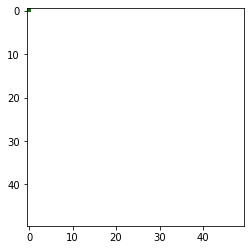

[(0, 0)]
neighbors [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
current_node (1, 0)
[1, 3, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
x_test [[1 3 3]
 [4 3 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (2, 0)
message down


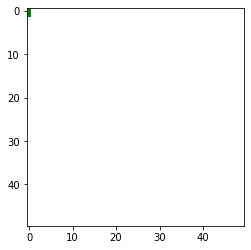

[(0, 0), (1, 0)]
neighbors [(1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
current_node (2, 0)
[1, 3, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
x_test [[1 3 3]
 [4 3 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (3, 0)
message down


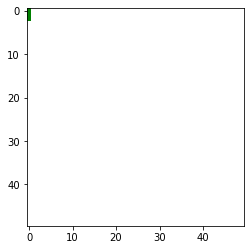

[(0, 0), (1, 0), (2, 0)]
neighbors [(2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1)]
current_node (3, 0)
[1, 3, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
x_test [[1 3 3]
 [4 3 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (4, 0)
message down


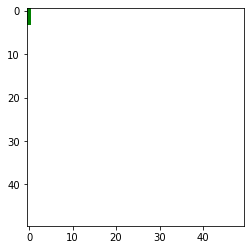

[(0, 0), (1, 0), (2, 0), (3, 0)]
neighbors [(3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1)]
current_node (4, 0)
[1, 3, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (5, 0), (5, 1), (5, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 1 0]]
x_test [[1 3 3]
 [4 3 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (5, 0)
message down


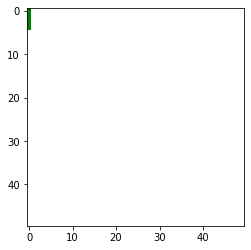

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)]
neighbors [(4, 0), (4, 1), (5, 0), (5, 1), (6, 0), (6, 1)]
current_node (5, 0)
[1, 3, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(4, 0), (4, 1), (4, 2), (5, 0), (5, 1), (5, 2), (6, 0), (6, 1), (6, 2)]
full grid: [[0 0 0]
 [0 1 0]
 [0 0 0]]
x_test [[1 3 3]
 [4 3 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (6, 0)
message down


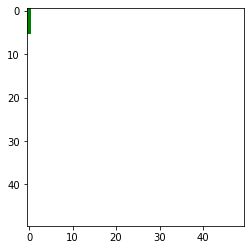

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
neighbors [(5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1)]
current_node (6, 0)
[1, 3, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(5, 0), (5, 1), (5, 2), (6, 0), (6, 1), (6, 2), (7, 0), (7, 1), (7, 2)]
full grid: [[0 1 0]
 [0 0 0]
 [0 0 1]]
x_test [[1 3 3]
 [4 3 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (7, 0)
message down


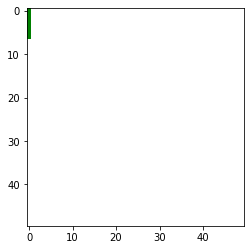

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0)]
neighbors [(6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1)]
current_node (7, 0)
[1, 3, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(6, 0), (6, 1), (6, 2), (7, 0), (7, 1), (7, 2), (8, 0), (8, 1), (8, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [1 0 0]]
x_test [[1 3 3]
 [4 3 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (8, 0)
message down


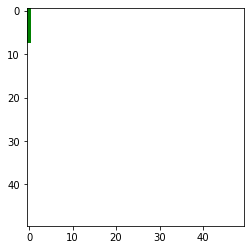

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0)]
neighbors [(7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1)]
current_node (8, 0)
[1, 3, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(7, 0), (7, 1), (7, 2), (8, 0), (8, 1), (8, 2), (9, 0), (9, 1), (9, 2)]
full grid: [[0 0 1]
 [1 0 0]
 [0 0 0]]
x_test [[1 3 3]
 [4 3 3]
 [3 3 3]]
blocked
next node::::  (7, 0)


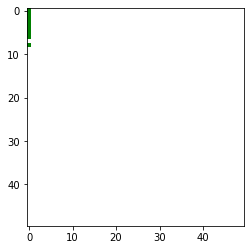

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)]
neighbors [(6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1)]
current_node (7, 0)
[1, 3, 3, 4, 3, 3, 2, 3, 3]
1
9
neighbors [(6, 0), (6, 1), (6, 2), (7, 0), (7, 1), (7, 2), (8, 0), (8, 1), (8, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [1 0 0]]
x_test [[1 3 3]
 [4 3 3]
 [2 3 3]]
free
predictions 0.9970227
(array([3], dtype=int64),)
next_node out (7, 1)
message right


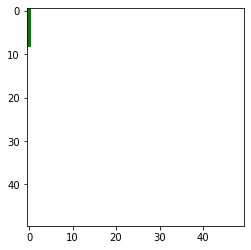

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)]
neighbors [(6, 0), (6, 1), (6, 2), (7, 0), (7, 1), (7, 2), (8, 0), (8, 1), (8, 2)]
current_node (7, 1)
[1, 3, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(6, 0), (6, 1), (6, 2), (7, 0), (7, 1), (7, 2), (8, 0), (8, 1), (8, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [1 0 0]]
x_test [[1 3 3]
 [1 4 3]
 [2 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (8, 1)
message down


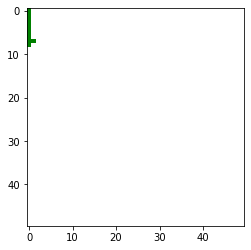

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1)]
neighbors [(7, 0), (7, 1), (7, 2), (8, 0), (8, 1), (8, 2), (9, 0), (9, 1), (9, 2)]
current_node (8, 1)
[1, 1, 3, 2, 4, 3, 3, 3, 3]
1
9
neighbors [(7, 0), (7, 1), (7, 2), (8, 0), (8, 1), (8, 2), (9, 0), (9, 1), (9, 2)]
full grid: [[0 0 1]
 [1 0 0]
 [0 0 0]]
x_test [[1 1 3]
 [2 4 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (9, 1)
message down


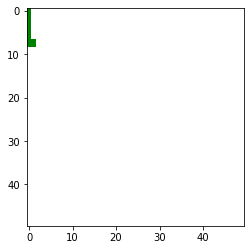

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1)]
neighbors [(8, 0), (8, 1), (8, 2), (9, 0), (9, 1), (9, 2), (10, 0), (10, 1), (10, 2)]
current_node (9, 1)
[2, 1, 3, 3, 4, 3, 3, 3, 3]
2
9
neighbors [(8, 0), (8, 1), (8, 2), (9, 0), (9, 1), (9, 2), (10, 0), (10, 1), (10, 2)]
full grid: [[1 0 0]
 [0 0 0]
 [0 0 0]]
x_test [[2 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.9997472
(array([1], dtype=int64),)
next_node out (10, 1)
message down


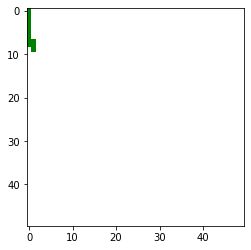

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1)]
neighbors [(9, 0), (9, 1), (9, 2), (10, 0), (10, 1), (10, 2), (11, 0), (11, 1), (11, 2)]
current_node (10, 1)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(9, 0), (9, 1), (9, 2), (10, 0), (10, 1), (10, 2), (11, 0), (11, 1), (11, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.99844617
(array([1], dtype=int64),)
next_node out (11, 1)
message down


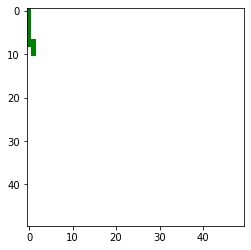

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1)]
neighbors [(10, 0), (10, 1), (10, 2), (11, 0), (11, 1), (11, 2), (12, 0), (12, 1), (12, 2)]
current_node (11, 1)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(10, 0), (10, 1), (10, 2), (11, 0), (11, 1), (11, 2), (12, 0), (12, 1), (12, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.99844617
(array([1], dtype=int64),)
next_node out (12, 1)
message down


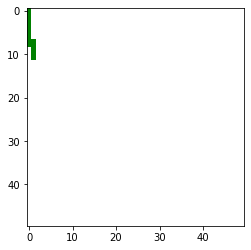

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]
neighbors [(11, 0), (11, 1), (11, 2), (12, 0), (12, 1), (12, 2), (13, 0), (13, 1), (13, 2)]
current_node (12, 1)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(11, 0), (11, 1), (11, 2), (12, 0), (12, 1), (12, 2), (13, 0), (13, 1), (13, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.99844617
(array([1], dtype=int64),)
next_node out (13, 1)
message down


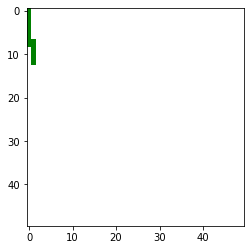

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]
neighbors [(12, 0), (12, 1), (12, 2), (13, 0), (13, 1), (13, 2), (14, 0), (14, 1), (14, 2)]
current_node (13, 1)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(12, 0), (12, 1), (12, 2), (13, 0), (13, 1), (13, 2), (14, 0), (14, 1), (14, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 1 0]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.99844617
(array([1], dtype=int64),)
next_node out (14, 1)
message down


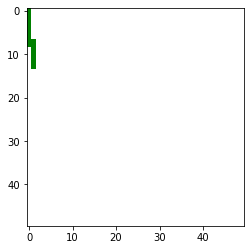

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]
neighbors [(13, 0), (13, 1), (13, 2), (14, 0), (14, 1), (14, 2), (15, 0), (15, 1), (15, 2)]
current_node (14, 1)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(13, 0), (13, 1), (13, 2), (14, 0), (14, 1), (14, 2), (15, 0), (15, 1), (15, 2)]
full grid: [[0 0 0]
 [0 1 0]
 [0 0 0]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
blocked
next node::::  (13, 1)


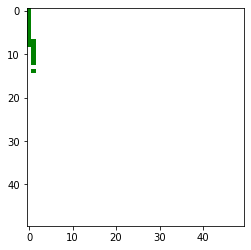

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]
neighbors [(12, 0), (12, 1), (12, 2), (13, 0), (13, 1), (13, 2), (14, 0), (14, 1), (14, 2)]
current_node (13, 1)
[3, 1, 3, 3, 4, 3, 3, 2, 3]
3
9
neighbors [(12, 0), (12, 1), (12, 2), (13, 0), (13, 1), (13, 2), (14, 0), (14, 1), (14, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 1 0]]
x_test [[3 1 3]
 [3 4 3]
 [3 2 3]]
free
predictions 0.97941375
(array([3], dtype=int64),)
next_node out (13, 2)
message right


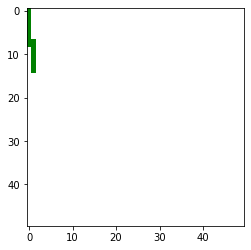

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]
neighbors [(12, 1), (12, 2), (12, 3), (13, 1), (13, 2), (13, 3), (14, 1), (14, 2), (14, 3)]
current_node (13, 2)
[1, 3, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(12, 1), (12, 2), (12, 3), (13, 1), (13, 2), (13, 3), (14, 1), (14, 2), (14, 3)]
full grid: [[0 0 0]
 [0 0 0]
 [1 0 0]]
x_test [[1 3 3]
 [1 4 3]
 [2 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (14, 2)
message down


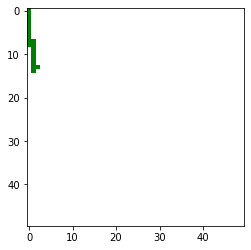

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2)]
neighbors [(13, 1), (13, 2), (13, 3), (14, 1), (14, 2), (14, 3), (15, 1), (15, 2), (15, 3)]
current_node (14, 2)
[1, 1, 3, 2, 4, 3, 3, 3, 3]
1
9
neighbors [(13, 1), (13, 2), (13, 3), (14, 1), (14, 2), (14, 3), (15, 1), (15, 2), (15, 3)]
full grid: [[0 0 0]
 [1 0 0]
 [0 0 0]]
x_test [[1 1 3]
 [2 4 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (15, 2)
message down


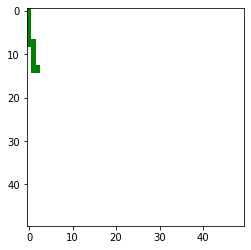

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2)]
neighbors [(14, 1), (14, 2), (14, 3), (15, 1), (15, 2), (15, 3), (16, 1), (16, 2), (16, 3)]
current_node (15, 2)
[2, 1, 3, 3, 4, 3, 3, 3, 3]
2
9
neighbors [(14, 1), (14, 2), (14, 3), (15, 1), (15, 2), (15, 3), (16, 1), (16, 2), (16, 3)]
full grid: [[1 0 0]
 [0 0 0]
 [1 0 0]]
x_test [[2 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.9997472
(array([1], dtype=int64),)
next_node out (16, 2)
message down


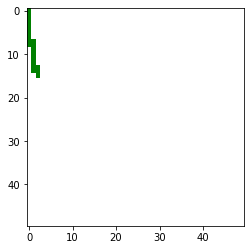

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2)]
neighbors [(15, 1), (15, 2), (15, 3), (16, 1), (16, 2), (16, 3), (17, 1), (17, 2), (17, 3)]
current_node (16, 2)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(15, 1), (15, 2), (15, 3), (16, 1), (16, 2), (16, 3), (17, 1), (17, 2), (17, 3)]
full grid: [[0 0 0]
 [1 0 0]
 [1 0 1]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.99844617
(array([1], dtype=int64),)
next_node out (17, 2)
message down


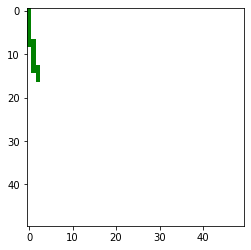

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2)]
neighbors [(16, 1), (16, 2), (16, 3), (17, 1), (17, 2), (17, 3), (18, 1), (18, 2), (18, 3)]
current_node (17, 2)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(16, 1), (16, 2), (16, 3), (17, 1), (17, 2), (17, 3), (18, 1), (18, 2), (18, 3)]
full grid: [[1 0 0]
 [1 0 1]
 [0 0 0]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.99844617
(array([1], dtype=int64),)
next_node out (18, 2)
message down


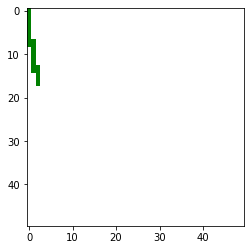

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2)]
neighbors [(17, 1), (17, 2), (17, 3), (18, 1), (18, 2), (18, 3), (19, 1), (19, 2), (19, 3)]
current_node (18, 2)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(17, 1), (17, 2), (17, 3), (18, 1), (18, 2), (18, 3), (19, 1), (19, 2), (19, 3)]
full grid: [[1 0 1]
 [0 0 0]
 [1 0 0]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.99844617
(array([1], dtype=int64),)
next_node out (19, 2)
message down


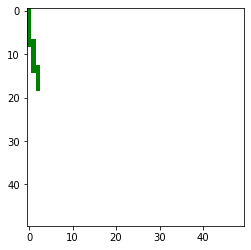

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2)]
neighbors [(18, 1), (18, 2), (18, 3), (19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3)]
current_node (19, 2)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(18, 1), (18, 2), (18, 3), (19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3)]
full grid: [[0 0 0]
 [1 0 0]
 [0 0 1]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.99844617
(array([1], dtype=int64),)
next_node out (20, 2)
message down


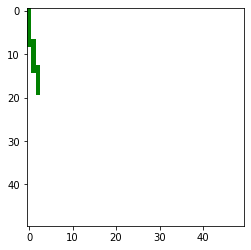

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2)]
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
current_node (20, 2)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
full grid: [[1 0 0]
 [0 0 1]
 [0 1 1]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.99844617
(array([1], dtype=int64),)
next_node out (21, 2)
message down


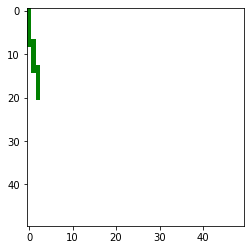

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2)]
neighbors [(20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3)]
current_node (21, 2)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [0 0 1]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
blocked
next node::::  (20, 2)


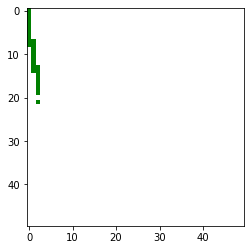

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2)]
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
current_node (20, 2)
[3, 1, 3, 3, 4, 3, 3, 2, 3]
3
9
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
full grid: [[1 0 0]
 [0 0 1]
 [0 1 1]]
x_test [[3 1 3]
 [3 4 3]
 [3 2 3]]
free
predictions 0.97941375
(array([3], dtype=int64),)
next_node out (20, 3)
message right


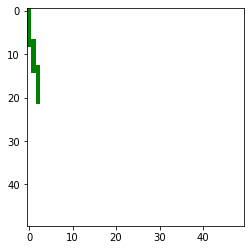

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2)]
neighbors [(19, 2), (19, 3), (19, 4), (20, 2), (20, 3), (20, 4), (21, 2), (21, 3), (21, 4)]
current_node (20, 3)
[1, 3, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(19, 2), (19, 3), (19, 4), (20, 2), (20, 3), (20, 4), (21, 2), (21, 3), (21, 4)]
full grid: [[0 0 0]
 [0 1 0]
 [1 1 0]]
x_test [[1 3 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (20, 2)


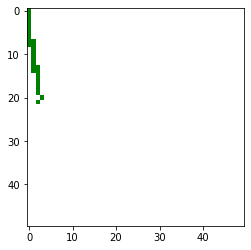

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3)]
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
current_node (20, 2)
[3, 1, 3, 3, 4, 2, 3, 2, 3]
3
9
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
full grid: [[1 0 0]
 [0 0 1]
 [0 1 1]]
x_test [[3 1 3]
 [3 4 2]
 [3 2 3]]
free
predictions 0.96411604
(array([1], dtype=int64),)
next_node out (20, 1)
message down


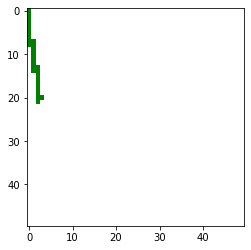

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3)]
neighbors [(19, 0), (19, 1), (19, 2), (20, 0), (20, 1), (20, 2), (21, 0), (21, 1), (21, 2)]
current_node (20, 1)
[3, 3, 1, 3, 4, 1, 3, 3, 2]
3
9
neighbors [(19, 0), (19, 1), (19, 2), (20, 0), (20, 1), (20, 2), (21, 0), (21, 1), (21, 2)]
full grid: [[0 1 0]
 [0 0 0]
 [0 0 1]]
x_test [[3 3 1]
 [3 4 1]
 [3 3 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (21, 1)
message down


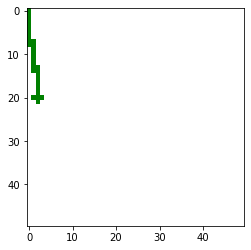

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1)]
neighbors [(20, 0), (20, 1), (20, 2), (21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2)]
current_node (21, 1)
[3, 1, 1, 3, 4, 2, 3, 3, 3]
3
9
neighbors [(20, 0), (20, 1), (20, 2), (21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 0 0]]
x_test [[3 1 1]
 [3 4 2]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (22, 1)
message down


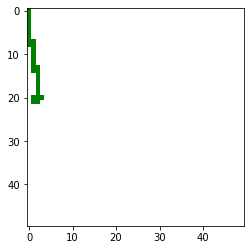

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1)]
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
current_node (22, 1)
[3, 1, 2, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 1]]
x_test [[3 1 2]
 [3 4 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (23, 1)
message down


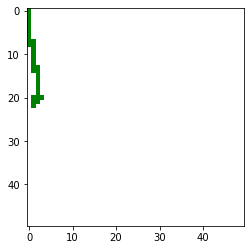

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1)]
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
current_node (23, 1)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
blocked
next node::::  (22, 1)


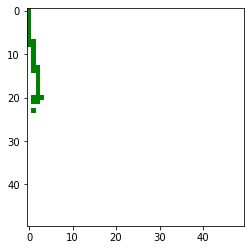

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1)]
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
current_node (22, 1)
[3, 1, 2, 3, 4, 3, 3, 2, 3]
3
9
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 1]]
x_test [[3 1 2]
 [3 4 3]
 [3 2 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (21, 1)
message down


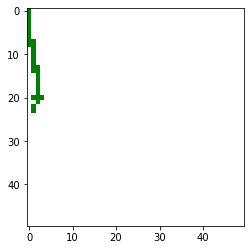

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1)]
neighbors [(20, 0), (20, 1), (20, 2), (21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2)]
current_node (21, 1)
[3, 1, 1, 3, 4, 2, 3, 1, 3]
3
9
neighbors [(20, 0), (20, 1), (20, 2), (21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 0 0]]
x_test [[3 1 1]
 [3 4 2]
 [3 1 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (21, 0)
message down


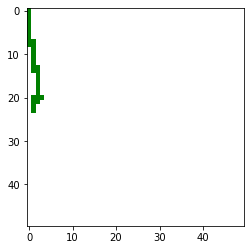

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1)]
neighbors [(20, 0), (20, 1), (21, 0), (21, 1), (22, 0), (22, 1)]
current_node (21, 0)
[3, 1, 1, 4, 1, 2, 3, 1, 3]
3
9
neighbors [(20, 0), (20, 1), (20, 2), (21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 0 0]]
x_test [[3 1 1]
 [4 1 2]
 [3 1 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (22, 0)
message down


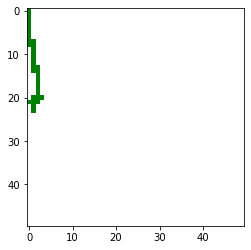

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0)]
neighbors [(21, 0), (21, 1), (22, 0), (22, 1), (23, 0), (23, 1)]
current_node (22, 0)
[1, 1, 2, 4, 1, 3, 3, 2, 3]
1
9
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 1]]
x_test [[1 1 2]
 [4 1 3]
 [3 2 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (23, 0)
message down


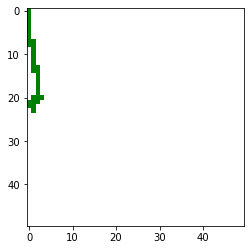

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0)]
neighbors [(22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1)]
current_node (23, 0)
[1, 1, 3, 4, 2, 3, 3, 3, 3]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 3]
 [4 2 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (24, 0)
message down


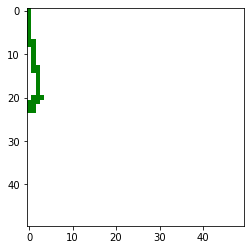

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 3]
 [4 3 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (25, 0)
message down


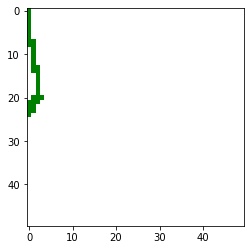

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0)]
neighbors [(24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1)]
current_node (25, 0)
[1, 3, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 3 3]
 [4 3 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (26, 0)
message down


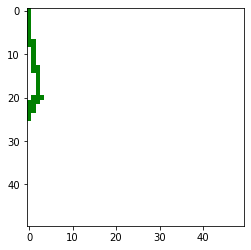

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0)]
neighbors [(25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1)]
current_node (26, 0)
[1, 3, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 3 3]
 [4 3 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (27, 0)
message down


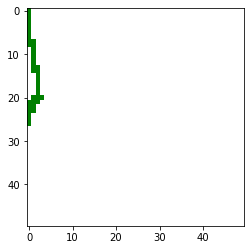

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0)]
neighbors [(26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1)]
current_node (27, 0)
[1, 3, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
full grid: [[0 1 0]
 [0 1 1]
 [1 0 0]]
x_test [[1 3 3]
 [4 3 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (28, 0)
message down


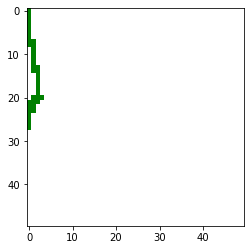

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0)]
neighbors [(27, 0), (27, 1), (28, 0), (28, 1), (29, 0), (29, 1)]
current_node (28, 0)
[1, 3, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2), (29, 0), (29, 1), (29, 2)]
full grid: [[0 1 1]
 [1 0 0]
 [0 0 0]]
x_test [[1 3 3]
 [4 3 3]
 [3 3 3]]
blocked
next node::::  (27, 0)


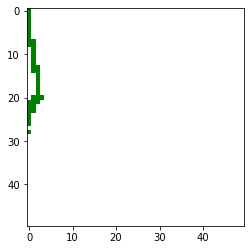

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0)]
neighbors [(26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1)]
current_node (27, 0)
[1, 3, 3, 4, 3, 3, 2, 3, 3]
1
9
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
full grid: [[0 1 0]
 [0 1 1]
 [1 0 0]]
x_test [[1 3 3]
 [4 3 3]
 [2 3 3]]
free
predictions 0.9970227
(array([3], dtype=int64),)
next_node out (27, 1)
message right


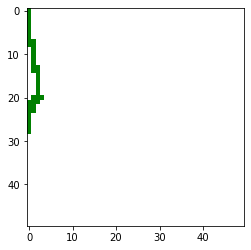

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0)]
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
current_node (27, 1)
[1, 3, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
full grid: [[0 1 0]
 [0 1 1]
 [1 0 0]]
x_test [[1 3 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (27, 0)


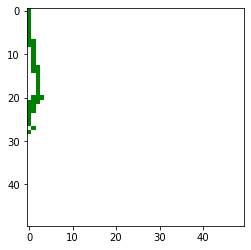

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1)]
neighbors [(26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1)]
current_node (27, 0)
[1, 3, 3, 4, 2, 3, 2, 3, 3]
1
9
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
full grid: [[0 1 0]
 [0 1 1]
 [1 0 0]]
x_test [[1 3 3]
 [4 2 3]
 [2 3 3]]
free
predictions 0.99992096
(array([0], dtype=int64),)
next_node out (28, 0)
message up


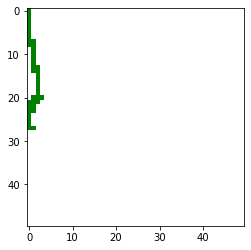

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1)]
neighbors [(27, 0), (27, 1), (28, 0), (28, 1), (29, 0), (29, 1)]
current_node (28, 0)
[1, 2, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2), (29, 0), (29, 1), (29, 2)]
full grid: [[0 1 1]
 [1 0 0]
 [0 0 0]]
x_test [[1 2 3]
 [4 3 3]
 [3 3 3]]
blocked
next node::::  (27, 0)


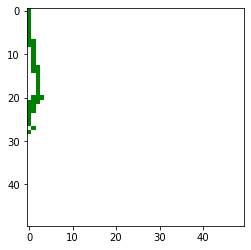

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1)]
neighbors [(26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1)]
current_node (27, 0)
[1, 3, 3, 4, 2, 3, 2, 3, 3]
1
9
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
full grid: [[0 1 0]
 [0 1 1]
 [1 0 0]]
x_test [[1 3 3]
 [4 2 3]
 [2 3 3]]
free
predictions 0.99992096
(array([0], dtype=int64),)
next_node out (26, 0)
message up


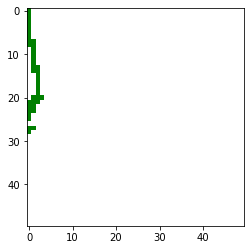

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1)]
neighbors [(25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1)]
current_node (26, 0)
[1, 3, 3, 4, 3, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 3 3]
 [4 3 3]
 [1 2 3]]
free
predictions 0.9999896
(array([3], dtype=int64),)
next_node out (26, 1)
message right


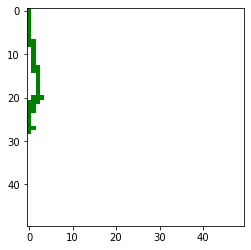

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1)]
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
current_node (26, 1)
[1, 3, 3, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 3 3]
 [1 4 3]
 [1 2 3]]
blocked
next node::::  (26, 0)


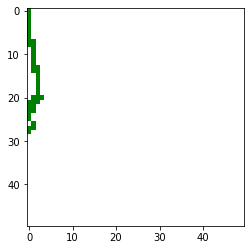

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1)]
neighbors [(25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1)]
current_node (26, 0)
[1, 3, 3, 4, 2, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 3 3]
 [4 2 3]
 [1 2 3]]
free
predictions 0.9996705
(array([1], dtype=int64),)
next_node out (25, 0)
message down


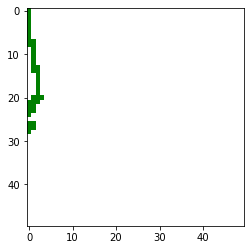

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1)]
neighbors [(24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1)]
current_node (25, 0)
[1, 3, 3, 4, 3, 3, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 3 3]
 [4 3 3]
 [1 2 3]]
free
predictions 0.9999896
(array([3], dtype=int64),)
next_node out (25, 1)
message right


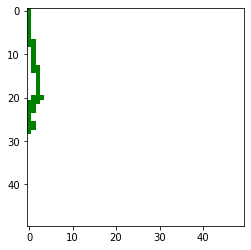

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 3, 3, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 3 3]
 [1 4 3]
 [1 2 3]]
free
predictions 0.9998197
(array([3], dtype=int64),)
next_node out (25, 2)
message right


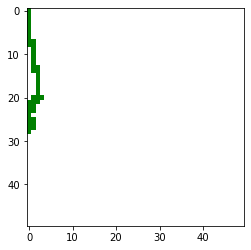

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[3, 3, 3, 1, 4, 3, 2, 3, 3]
3
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[3 3 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (25, 1)


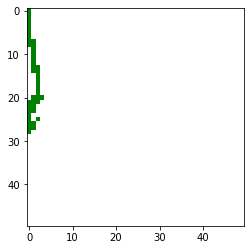

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 3, 3, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 3 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.99992764
(array([0], dtype=int64),)
next_node out (24, 1)
message up


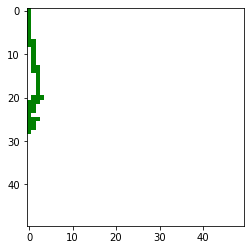

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 3, 1, 4, 3, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 3]
 [1 4 3]
 [1 1 2]]
free
predictions 0.99999785
(array([3], dtype=int64),)
next_node out (24, 2)
message right


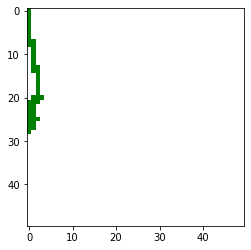

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 3, 3, 1, 4, 3, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 3 3]
 [1 4 3]
 [1 2 3]]
free
predictions 0.9999999
(array([3], dtype=int64),)
next_node out (24, 3)
message right


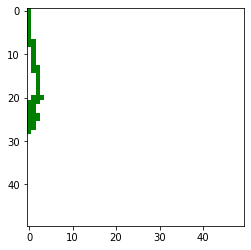

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2)]
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
current_node (24, 3)
[3, 3, 3, 1, 4, 3, 2, 3, 3]
3
9
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
full grid: [[1 1 0]
 [0 1 0]
 [1 1 1]]
x_test [[3 3 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


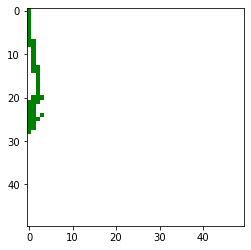

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 3, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 3 3]
 [1 4 2]
 [1 2 3]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (23, 2)
message up


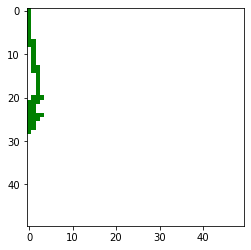

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
current_node (23, 2)
[1, 3, 3, 2, 4, 3, 1, 1, 2]
1
9
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 1]
 [1 1 1]
 [0 0 1]]
x_test [[1 3 3]
 [2 4 3]
 [1 1 2]]
blocked
next node::::  (24, 2)


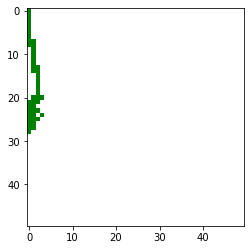

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 1)
message left


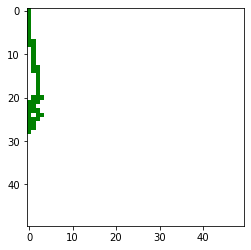

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (23, 1)
message up


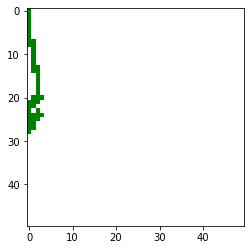

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
current_node (23, 1)
[1, 1, 3, 1, 4, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 3]
 [1 4 2]
 [1 1 1]]
blocked
next node::::  (24, 1)


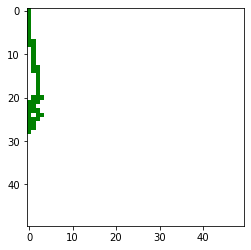

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 2)
message up


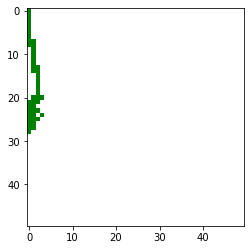

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (25, 2)
message left


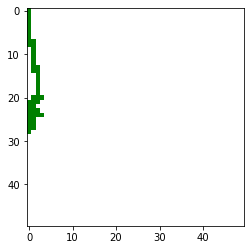

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


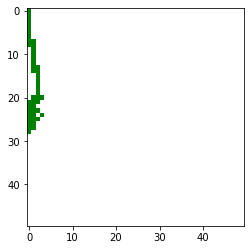

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 3)
message left


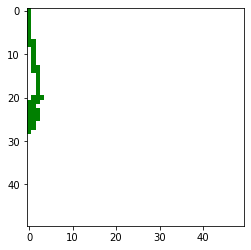

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
current_node (24, 3)
[2, 3, 3, 1, 4, 3, 2, 3, 3]
2
9
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
full grid: [[1 1 0]
 [0 1 0]
 [1 1 1]]
x_test [[2 3 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


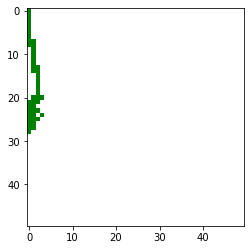

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 1)
message left


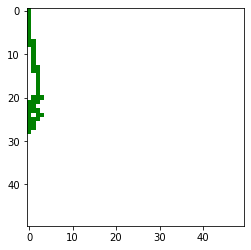

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (23, 1)
message up


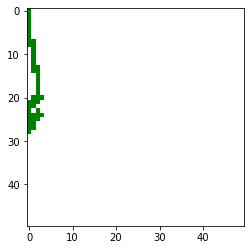

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
current_node (23, 1)
[1, 1, 3, 1, 4, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 3]
 [1 4 2]
 [1 1 1]]
blocked
next node::::  (24, 1)


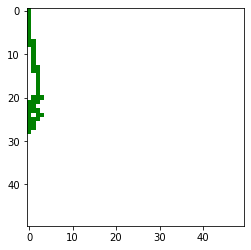

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (23, 1)
message up


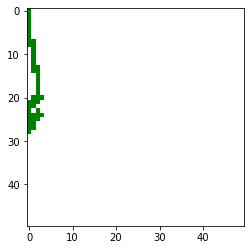

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
current_node (23, 1)
[1, 1, 3, 1, 4, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 3]
 [1 4 2]
 [1 1 1]]
blocked
next node::::  (24, 1)


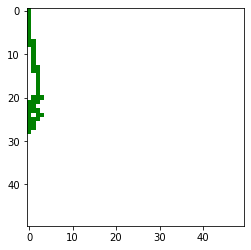

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (25, 1)
message up


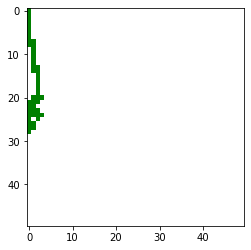

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (24, 1)
message right


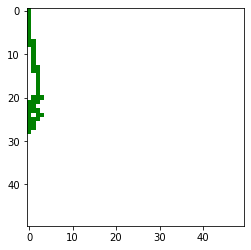

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (25, 1)
message up


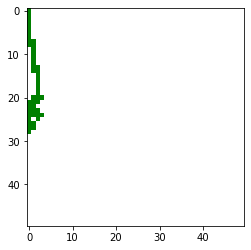

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (25, 2)
message right


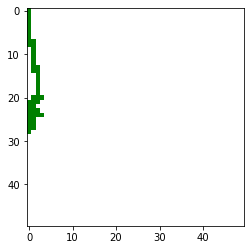

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (25, 1)


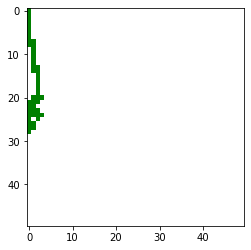

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (24, 1)
message right


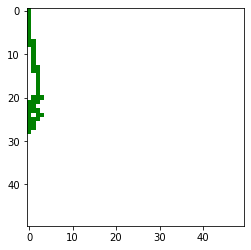

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (25, 1)
message up


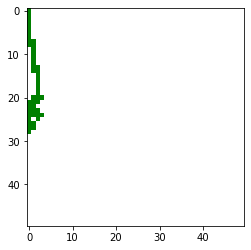

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (26, 1)
message right


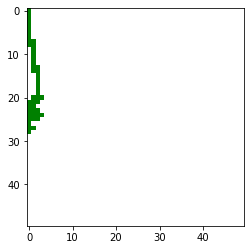

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
current_node (26, 1)
[1, 1, 2, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 3]
 [1 2 3]]
blocked
next node::::  (25, 1)


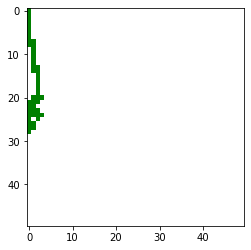

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (24, 1)
message right


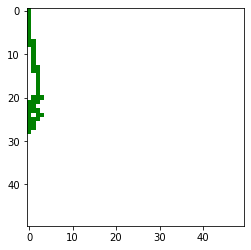

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (25, 1)
message up


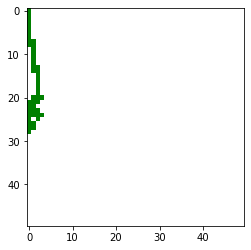

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (24, 1)
message right


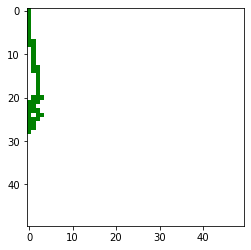

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 0)
message up


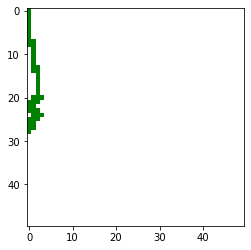

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (25, 0)
message down


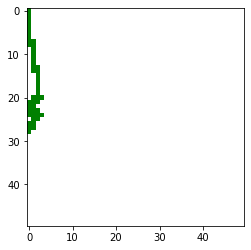

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1)]
current_node (25, 0)
[1, 1, 1, 4, 1, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [4 1 2]
 [1 2 3]]
free
predictions 0.99999976
(array([1], dtype=int64),)
next_node out (26, 0)
message down


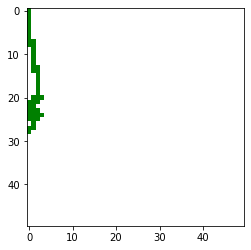

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1)]
current_node (26, 0)
[1, 1, 2, 4, 2, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [4 2 3]
 [1 2 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (26, 1)
message down


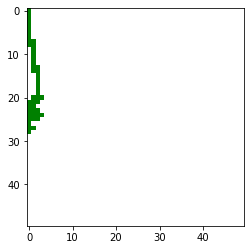

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
current_node (26, 1)
[1, 1, 2, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 3]
 [1 2 3]]
blocked
next node::::  (26, 0)


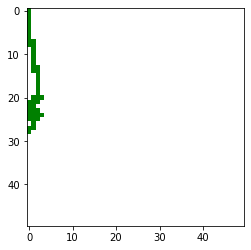

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1)]
current_node (26, 0)
[1, 1, 2, 4, 2, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [4 2 3]
 [1 2 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (26, 1)
message down


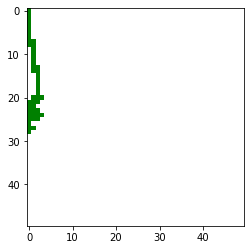

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
current_node (26, 1)
[1, 1, 2, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 3]
 [1 2 3]]
blocked
next node::::  (26, 0)


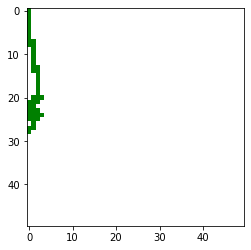

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1)]
current_node (26, 0)
[1, 1, 2, 4, 2, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [4 2 3]
 [1 2 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (27, 0)
message down


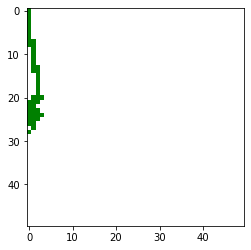

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1)]
current_node (27, 0)
[1, 2, 3, 4, 2, 3, 2, 3, 3]
1
9
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
full grid: [[0 1 0]
 [0 1 1]
 [1 0 0]]
x_test [[1 2 3]
 [4 2 3]
 [2 3 3]]
free
predictions 0.99782974
(array([0], dtype=int64),)
next_node out (28, 0)
message up


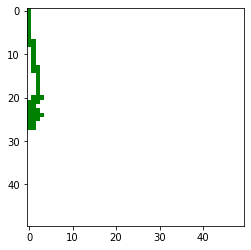

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(27, 0), (27, 1), (28, 0), (28, 1), (29, 0), (29, 1)]
current_node (28, 0)
[1, 2, 3, 4, 3, 3, 3, 3, 3]
1
9
neighbors [(27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2), (29, 0), (29, 1), (29, 2)]
full grid: [[0 1 1]
 [1 0 0]
 [0 0 0]]
x_test [[1 2 3]
 [4 3 3]
 [3 3 3]]
blocked
next node::::  (27, 0)


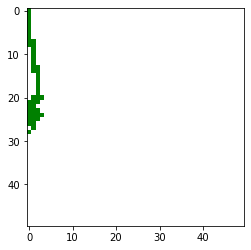

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1)]
current_node (27, 0)
[1, 2, 3, 4, 2, 3, 2, 3, 3]
1
9
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
full grid: [[0 1 0]
 [0 1 1]
 [1 0 0]]
x_test [[1 2 3]
 [4 2 3]
 [2 3 3]]
free
predictions 0.99782974
(array([0], dtype=int64),)
next_node out (27, 1)
message up


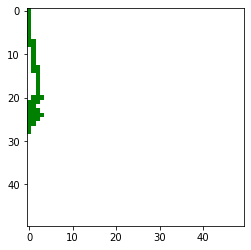

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
current_node (27, 1)
[1, 2, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
full grid: [[0 1 0]
 [0 1 1]
 [1 0 0]]
x_test [[1 2 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (27, 0)


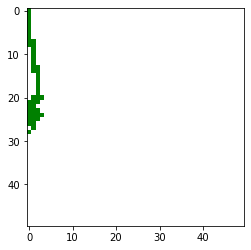

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1)]
current_node (27, 0)
[1, 2, 3, 4, 2, 3, 2, 3, 3]
1
9
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
full grid: [[0 1 0]
 [0 1 1]
 [1 0 0]]
x_test [[1 2 3]
 [4 2 3]
 [2 3 3]]
free
predictions 0.99782974
(array([0], dtype=int64),)
next_node out (27, 1)
message up


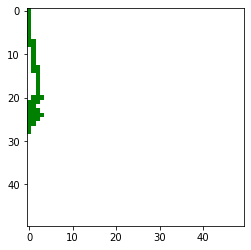

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
current_node (27, 1)
[1, 2, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
full grid: [[0 1 0]
 [0 1 1]
 [1 0 0]]
x_test [[1 2 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (27, 0)


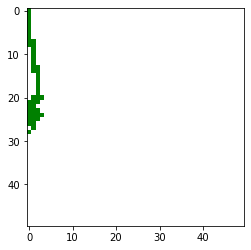

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1)]
current_node (27, 0)
[1, 2, 3, 4, 2, 3, 2, 3, 3]
1
9
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
full grid: [[0 1 0]
 [0 1 1]
 [1 0 0]]
x_test [[1 2 3]
 [4 2 3]
 [2 3 3]]
free
predictions 0.99782974
(array([0], dtype=int64),)
next_node out (27, 1)
message up


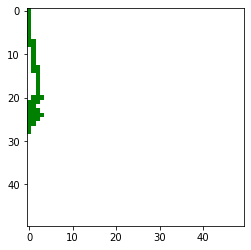

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
current_node (27, 1)
[1, 2, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
full grid: [[0 1 0]
 [0 1 1]
 [1 0 0]]
x_test [[1 2 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (27, 0)


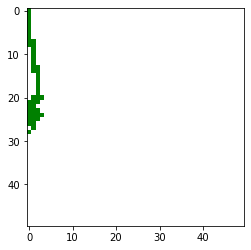

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1)]
current_node (27, 0)
[1, 2, 3, 4, 2, 3, 2, 3, 3]
1
9
neighbors [(26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2), (28, 0), (28, 1), (28, 2)]
full grid: [[0 1 0]
 [0 1 1]
 [1 0 0]]
x_test [[1 2 3]
 [4 2 3]
 [2 3 3]]
free
predictions 0.99782974
(array([0], dtype=int64),)
next_node out (26, 0)
message up


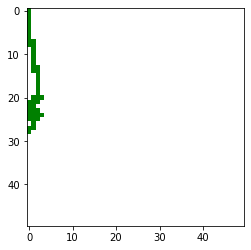

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1)]
current_node (26, 0)
[1, 1, 2, 4, 2, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [4 2 3]
 [1 2 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (26, 1)
message down


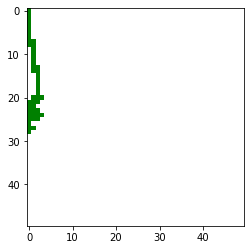

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
current_node (26, 1)
[1, 1, 2, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 3]
 [1 2 3]]
blocked
next node::::  (26, 0)


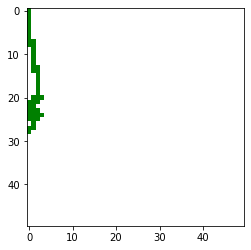

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1)]
current_node (26, 0)
[1, 1, 2, 4, 2, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [4 2 3]
 [1 2 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (25, 0)
message down


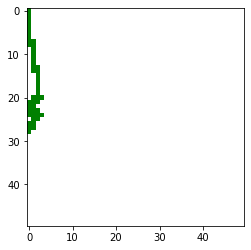

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1)]
current_node (25, 0)
[1, 1, 1, 4, 1, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [4 1 2]
 [1 2 3]]
free
predictions 0.99999976
(array([1], dtype=int64),)
next_node out (26, 0)
message down


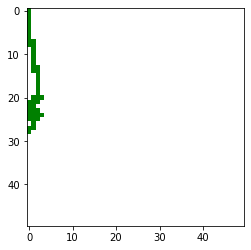

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1)]
current_node (26, 0)
[1, 1, 2, 4, 2, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [4 2 3]
 [1 2 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (25, 0)
message down


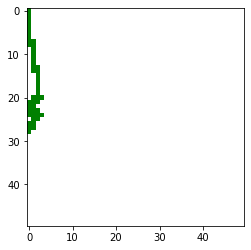

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1)]
current_node (25, 0)
[1, 1, 1, 4, 1, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [4 1 2]
 [1 2 3]]
free
predictions 0.99999976
(array([1], dtype=int64),)
next_node out (24, 0)
message down


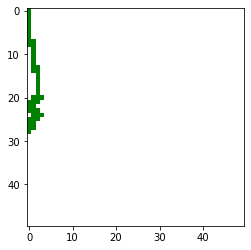

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (23, 0)
message down


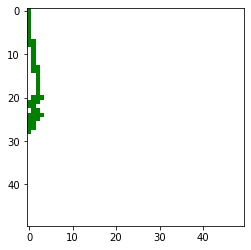

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1)]
current_node (23, 0)
[1, 1, 3, 4, 2, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 3]
 [4 2 2]
 [1 1 1]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (22, 0)
message down


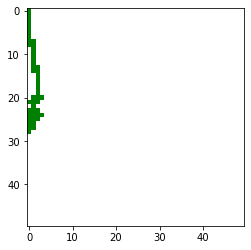

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(21, 0), (21, 1), (22, 0), (22, 1), (23, 0), (23, 1)]
current_node (22, 0)
[1, 1, 2, 4, 1, 3, 1, 2, 2]
1
9
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 1]]
x_test [[1 1 2]
 [4 1 3]
 [1 2 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (22, 1)
message down


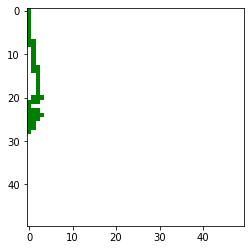

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
current_node (22, 1)
[1, 1, 2, 1, 4, 3, 1, 2, 2]
1
9
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 3]
 [1 2 2]]
free
predictions 0.95951873
(array([3], dtype=int64),)
next_node out (22, 2)
message right


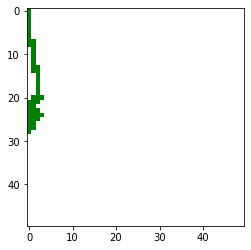

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2)]
neighbors [(21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3)]
current_node (22, 2)
[1, 2, 3, 1, 4, 3, 2, 2, 3]
1
9
neighbors [(21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3)]
full grid: [[0 1 1]
 [0 0 1]
 [1 1 1]]
x_test [[1 2 3]
 [1 4 3]
 [2 2 3]]
free
predictions 0.5939589
(array([3], dtype=int64),)
next_node out (22, 3)
message right


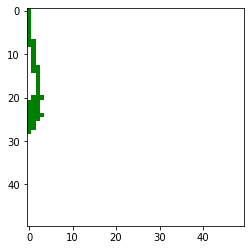

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2)]
neighbors [(21, 2), (21, 3), (21, 4), (22, 2), (22, 3), (22, 4), (23, 2), (23, 3), (23, 4)]
current_node (22, 3)
[2, 3, 3, 1, 4, 3, 2, 3, 3]
2
9
neighbors [(21, 2), (21, 3), (21, 4), (22, 2), (22, 3), (22, 4), (23, 2), (23, 3), (23, 4)]
full grid: [[1 1 0]
 [0 1 0]
 [1 1 0]]
x_test [[2 3 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (22, 2)


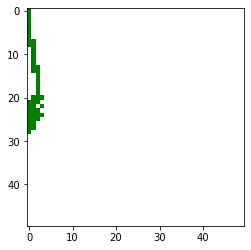

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3)]
current_node (22, 2)
[1, 2, 3, 1, 4, 2, 2, 2, 3]
1
9
neighbors [(21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3)]
full grid: [[0 1 1]
 [0 0 1]
 [1 1 1]]
x_test [[1 2 3]
 [1 4 2]
 [2 2 3]]
free
predictions 0.99983966
(array([1], dtype=int64),)
next_node out (22, 1)
message down


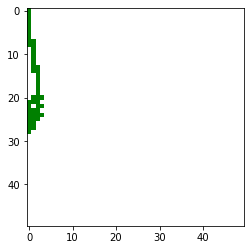

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
current_node (22, 1)
[1, 1, 2, 1, 4, 1, 1, 2, 2]
1
9
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 1]
 [1 2 2]]
free
predictions 0.98271435
(array([1], dtype=int64),)
next_node out (23, 1)
message down


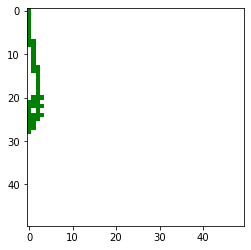

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
current_node (23, 1)
[1, 1, 1, 1, 4, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 1 1]]
blocked
next node::::  (22, 1)


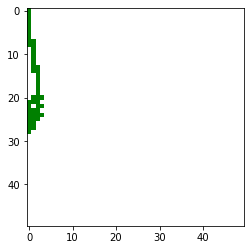

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
current_node (22, 1)
[1, 1, 2, 1, 4, 1, 1, 2, 2]
1
9
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 1]
 [1 2 2]]
free
predictions 0.98271435
(array([1], dtype=int64),)
next_node out (22, 2)
message down


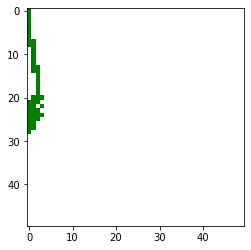

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3)]
current_node (22, 2)
[1, 2, 3, 1, 4, 2, 2, 2, 3]
1
9
neighbors [(21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3)]
full grid: [[0 1 1]
 [0 0 1]
 [1 1 1]]
x_test [[1 2 3]
 [1 4 2]
 [2 2 3]]
free
predictions 0.99983966
(array([1], dtype=int64),)
next_node out (22, 1)
message down


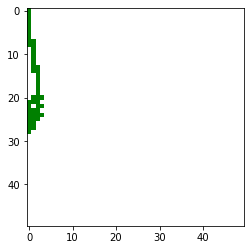

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
current_node (22, 1)
[1, 1, 2, 1, 4, 1, 1, 2, 2]
1
9
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 1]
 [1 2 2]]
free
predictions 0.98271435
(array([1], dtype=int64),)
next_node out (22, 2)
message down


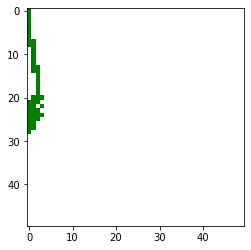

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3)]
current_node (22, 2)
[1, 2, 3, 1, 4, 2, 2, 2, 3]
1
9
neighbors [(21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3)]
full grid: [[0 1 1]
 [0 0 1]
 [1 1 1]]
x_test [[1 2 3]
 [1 4 2]
 [2 2 3]]
free
predictions 0.99983966
(array([1], dtype=int64),)
next_node out (22, 1)
message down


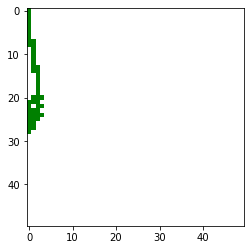

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
current_node (22, 1)
[1, 1, 2, 1, 4, 1, 1, 2, 2]
1
9
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 1]
 [1 2 2]]
free
predictions 0.98271435
(array([1], dtype=int64),)
next_node out (22, 0)
message down


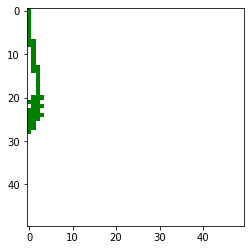

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(21, 0), (21, 1), (22, 0), (22, 1), (23, 0), (23, 1)]
current_node (22, 0)
[1, 1, 2, 4, 1, 1, 1, 2, 2]
1
9
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 1]]
x_test [[1 1 2]
 [4 1 1]
 [1 2 2]]
free
predictions 0.99968934
(array([1], dtype=int64),)
next_node out (23, 0)
message down


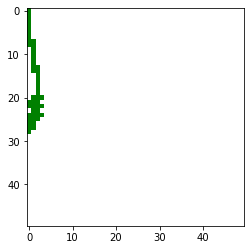

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1)]
current_node (23, 0)
[1, 1, 1, 4, 2, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [4 2 2]
 [1 1 1]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (24, 0)
message down


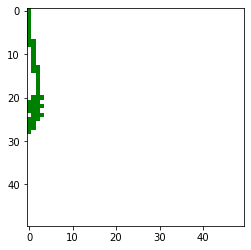

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (23, 0)
message down


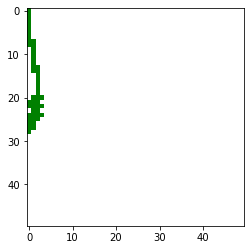

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1)]
current_node (23, 0)
[1, 1, 1, 4, 2, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [4 2 2]
 [1 1 1]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (23, 1)
message down


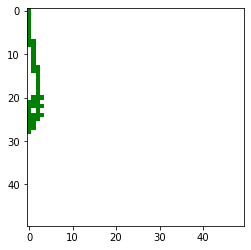

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
current_node (23, 1)
[1, 1, 1, 1, 4, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 1 1]]
blocked
next node::::  (23, 0)


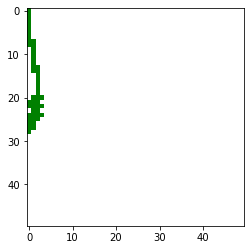

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1)]
current_node (23, 0)
[1, 1, 1, 4, 2, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [4 2 2]
 [1 1 1]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (24, 0)
message down


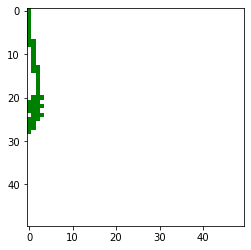

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (25, 0)
message down


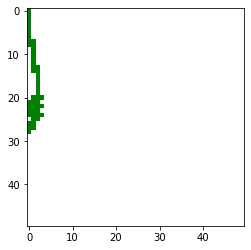

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1)]
current_node (25, 0)
[1, 1, 1, 4, 1, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [4 1 2]
 [1 2 3]]
free
predictions 0.99999976
(array([1], dtype=int64),)
next_node out (25, 1)
message down


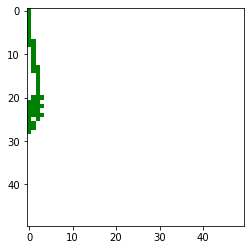

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (24, 1)
message right


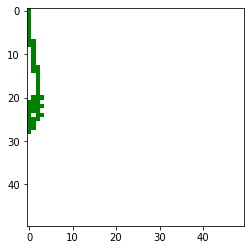

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 2)
message up


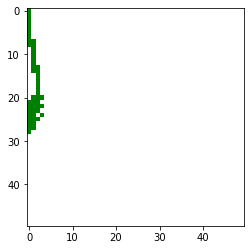

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (25, 2)
message left


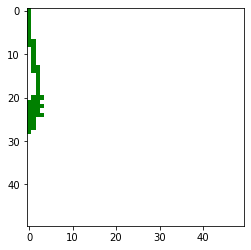

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


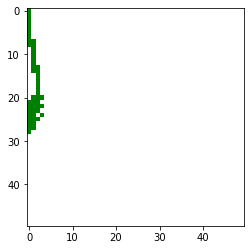

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (23, 2)
message left


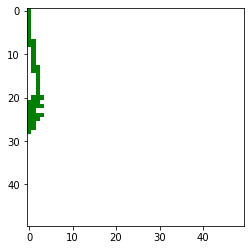

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
current_node (23, 2)
[1, 1, 2, 2, 4, 3, 1, 1, 2]
1
9
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 1]
 [1 1 1]
 [0 0 1]]
x_test [[1 1 2]
 [2 4 3]
 [1 1 2]]
blocked
next node::::  (24, 2)


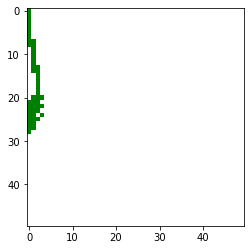

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (23, 2)
message left


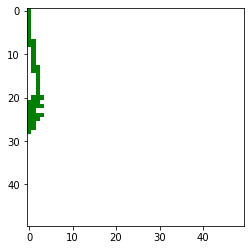

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
current_node (23, 2)
[1, 1, 2, 2, 4, 3, 1, 1, 2]
1
9
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 1]
 [1 1 1]
 [0 0 1]]
x_test [[1 1 2]
 [2 4 3]
 [1 1 2]]
blocked
next node::::  (24, 2)


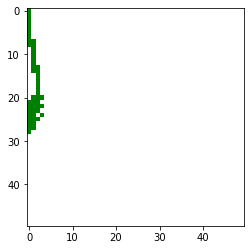

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (25, 2)
message left


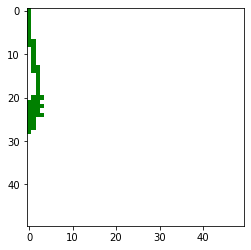

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


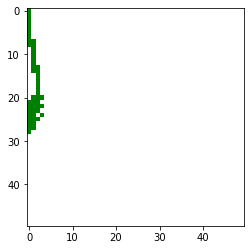

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (23, 2)
message left


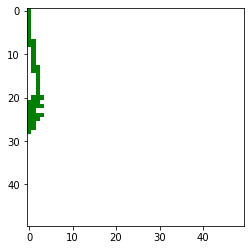

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
current_node (23, 2)
[1, 1, 2, 2, 4, 3, 1, 1, 2]
1
9
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 1]
 [1 1 1]
 [0 0 1]]
x_test [[1 1 2]
 [2 4 3]
 [1 1 2]]
blocked
next node::::  (24, 2)


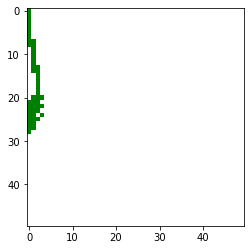

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 1)
message left


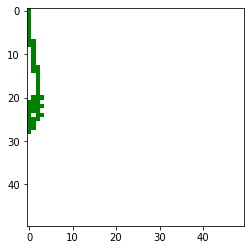

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 0)
message up


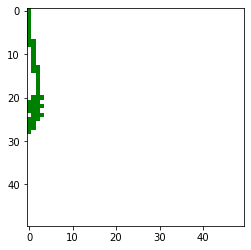

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (23, 0)
message down


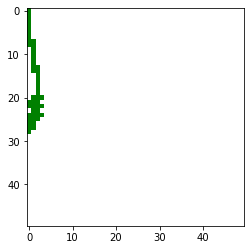

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1)]
current_node (23, 0)
[1, 1, 1, 4, 2, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [4 2 2]
 [1 1 1]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (24, 0)
message down


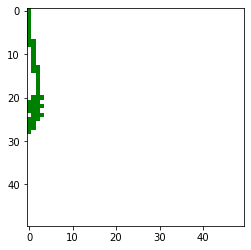

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (24, 1)
message down


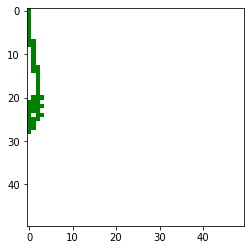

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 2)
message up


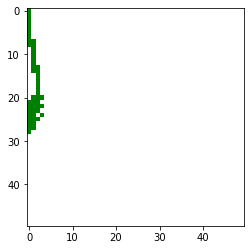

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (23, 2)
message left


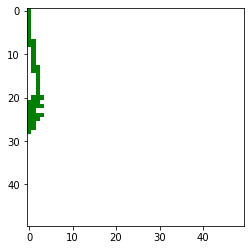

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
current_node (23, 2)
[1, 1, 2, 2, 4, 3, 1, 1, 2]
1
9
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 1]
 [1 1 1]
 [0 0 1]]
x_test [[1 1 2]
 [2 4 3]
 [1 1 2]]
blocked
next node::::  (24, 2)


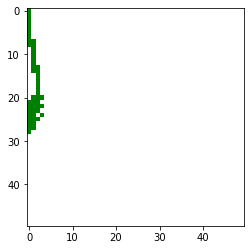

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (23, 2)
message left


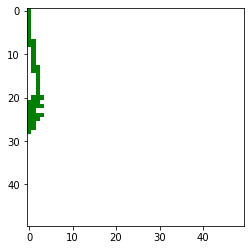

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
current_node (23, 2)
[1, 1, 2, 2, 4, 3, 1, 1, 2]
1
9
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 1]
 [1 1 1]
 [0 0 1]]
x_test [[1 1 2]
 [2 4 3]
 [1 1 2]]
blocked
next node::::  (24, 2)


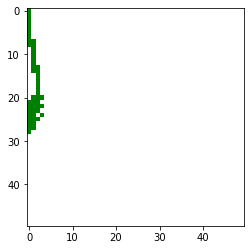

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (23, 2)
message left


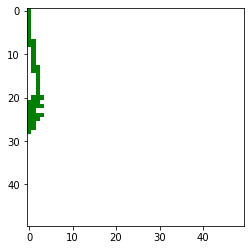

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
current_node (23, 2)
[1, 1, 2, 2, 4, 3, 1, 1, 2]
1
9
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 1]
 [1 1 1]
 [0 0 1]]
x_test [[1 1 2]
 [2 4 3]
 [1 1 2]]
blocked
next node::::  (24, 2)


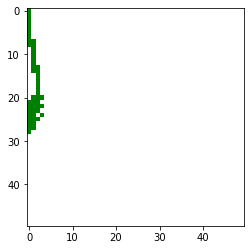

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (23, 2)
message left


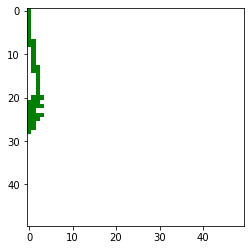

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
current_node (23, 2)
[1, 1, 2, 2, 4, 3, 1, 1, 2]
1
9
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 1]
 [1 1 1]
 [0 0 1]]
x_test [[1 1 2]
 [2 4 3]
 [1 1 2]]
blocked
next node::::  (24, 2)


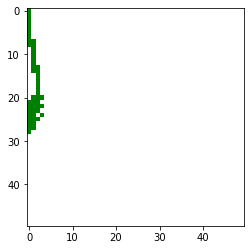

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (25, 2)
message left


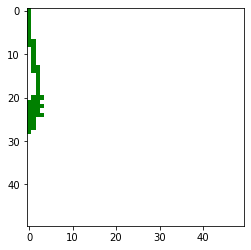

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


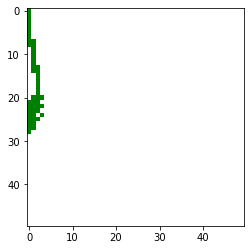

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (23, 2)
message left


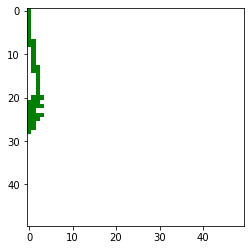

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
current_node (23, 2)
[1, 1, 2, 2, 4, 3, 1, 1, 2]
1
9
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 1]
 [1 1 1]
 [0 0 1]]
x_test [[1 1 2]
 [2 4 3]
 [1 1 2]]
blocked
next node::::  (24, 2)


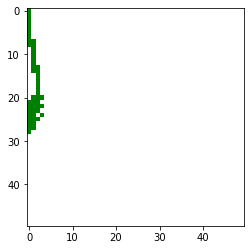

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (25, 2)
message left


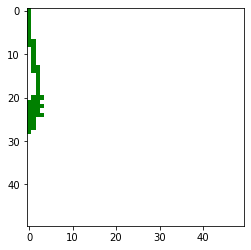

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


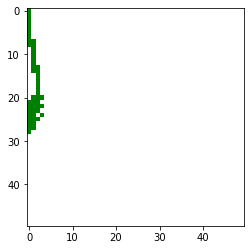

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (25, 2)
message left


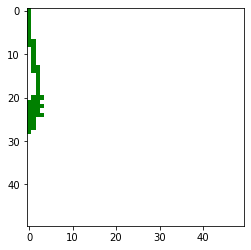

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


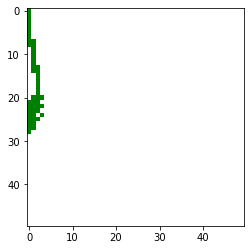

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (25, 2)
message left


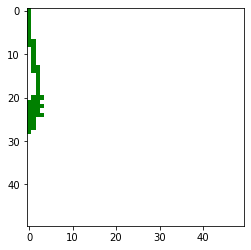

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


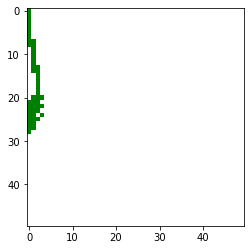

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (25, 2)
message left


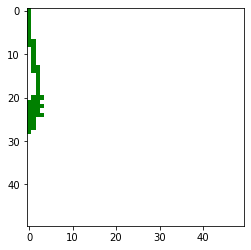

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


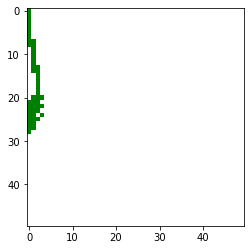

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (25, 2)
message left


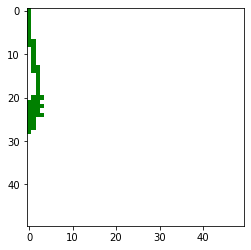

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


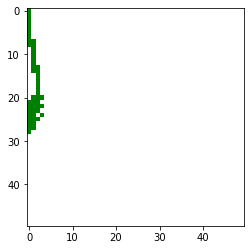

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (23, 2)
message left


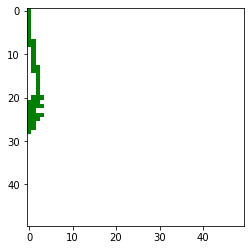

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
current_node (23, 2)
[1, 1, 2, 2, 4, 3, 1, 1, 2]
1
9
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 1]
 [1 1 1]
 [0 0 1]]
x_test [[1 1 2]
 [2 4 3]
 [1 1 2]]
blocked
next node::::  (24, 2)


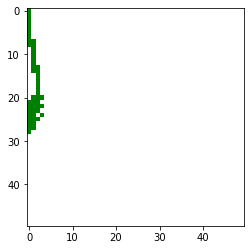

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (23, 2)
message left


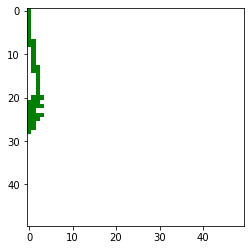

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
current_node (23, 2)
[1, 1, 2, 2, 4, 3, 1, 1, 2]
1
9
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 1]
 [1 1 1]
 [0 0 1]]
x_test [[1 1 2]
 [2 4 3]
 [1 1 2]]
blocked
next node::::  (24, 2)


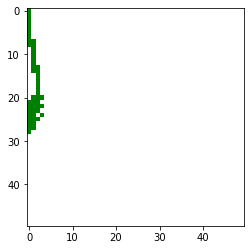

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 3)
message left


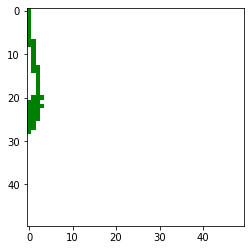

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
current_node (24, 3)
[2, 3, 3, 1, 4, 3, 2, 3, 3]
2
9
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
full grid: [[1 1 0]
 [0 1 0]
 [1 1 1]]
x_test [[2 3 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


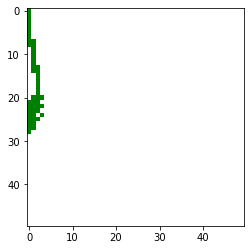

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 3)
message left


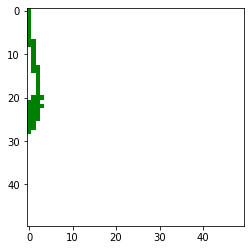

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
current_node (24, 3)
[2, 3, 3, 1, 4, 3, 2, 3, 3]
2
9
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
full grid: [[1 1 0]
 [0 1 0]
 [1 1 1]]
x_test [[2 3 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


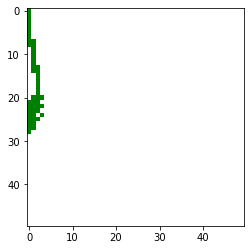

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (25, 2)
message left


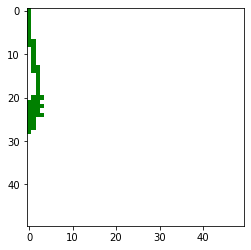

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


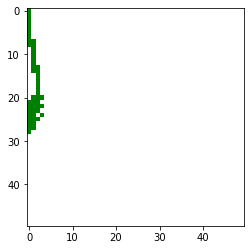

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (25, 2)
message left


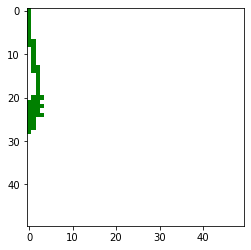

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


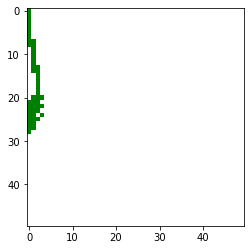

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 1)
message left


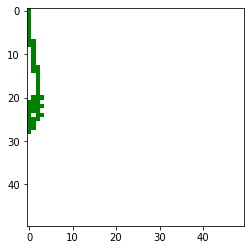

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (23, 1)
message up


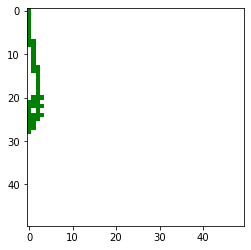

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
current_node (23, 1)
[1, 1, 1, 1, 4, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 1 1]]
blocked
next node::::  (24, 1)


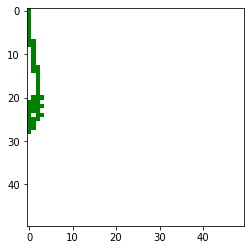

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (23, 1)
message up


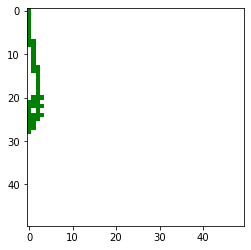

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
current_node (23, 1)
[1, 1, 1, 1, 4, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 1 1]]
blocked
next node::::  (24, 1)


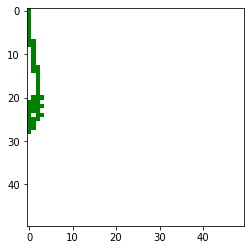

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 0)
message up


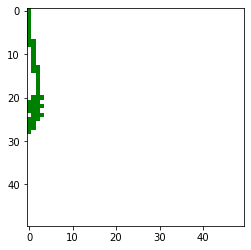

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (24, 1)
message down


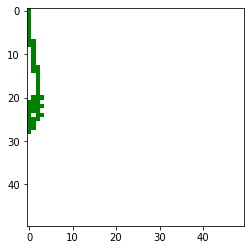

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (25, 1)
message up


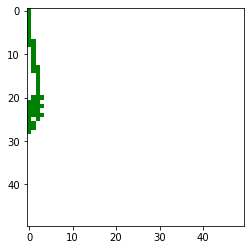

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (25, 0)
message right


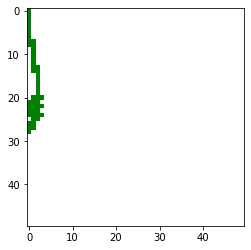

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1)]
current_node (25, 0)
[1, 1, 1, 4, 1, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [4 1 2]
 [1 2 3]]
free
predictions 0.99999976
(array([1], dtype=int64),)
next_node out (25, 1)
message down


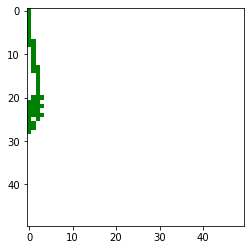

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (25, 0)
message right


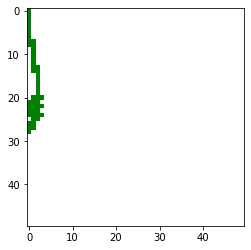

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1)]
current_node (25, 0)
[1, 1, 1, 4, 1, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [4 1 2]
 [1 2 3]]
free
predictions 0.99999976
(array([1], dtype=int64),)
next_node out (25, 1)
message down


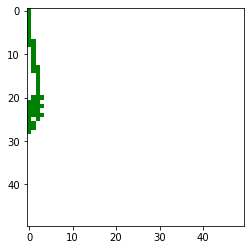

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (26, 1)
message right


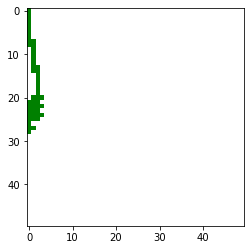

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
current_node (26, 1)
[1, 1, 2, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 3]
 [1 2 3]]
blocked
next node::::  (25, 1)


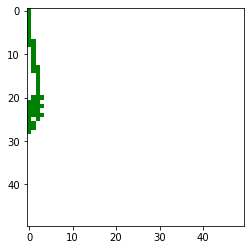

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (26, 1)
message right


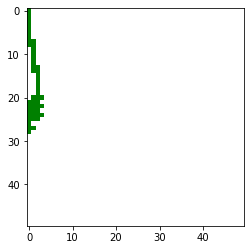

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
current_node (26, 1)
[1, 1, 2, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 3]
 [1 2 3]]
blocked
next node::::  (25, 1)


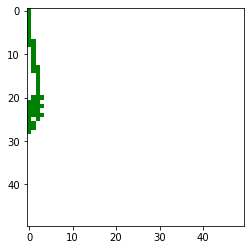

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (26, 1)
message right


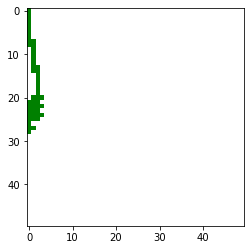

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
current_node (26, 1)
[1, 1, 2, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 3]
 [1 2 3]]
blocked
next node::::  (25, 1)


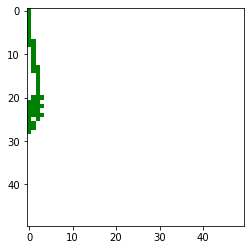

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (26, 1)
message right


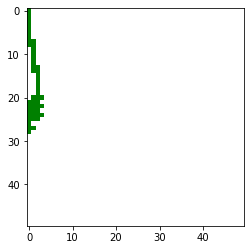

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
current_node (26, 1)
[1, 1, 2, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 3]
 [1 2 3]]
blocked
next node::::  (25, 1)


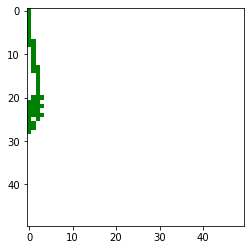

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (25, 0)
message right


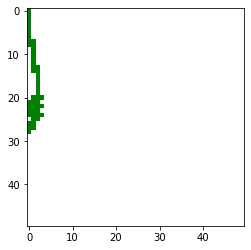

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1)]
current_node (25, 0)
[1, 1, 1, 4, 1, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [4 1 2]
 [1 2 3]]
free
predictions 0.99999976
(array([1], dtype=int64),)
next_node out (24, 0)
message down


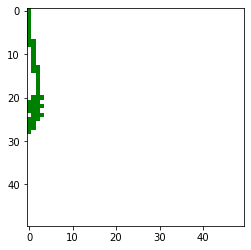

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (24, 1)
message down


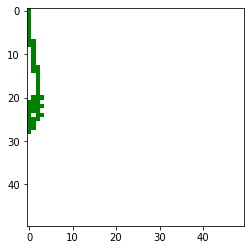

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (25, 1)
message up


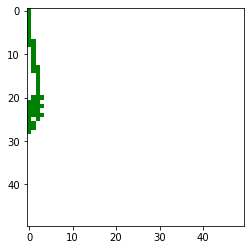

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (25, 2)
message right


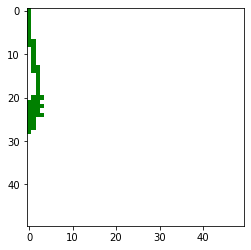

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (25, 1)


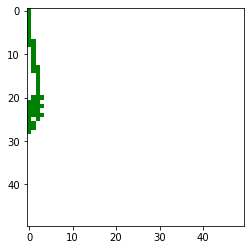

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (26, 1)
message right


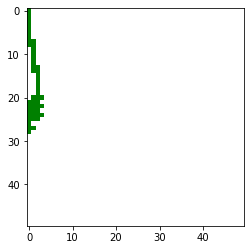

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
current_node (26, 1)
[1, 1, 2, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 3]
 [1 2 3]]
blocked
next node::::  (25, 1)


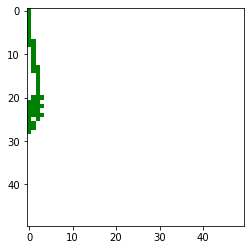

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (24, 1)
message right


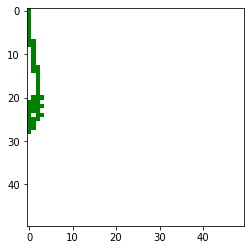

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 2)
message up


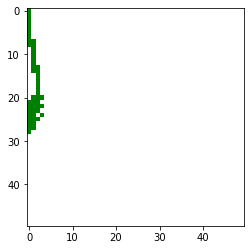

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (23, 2)
message left


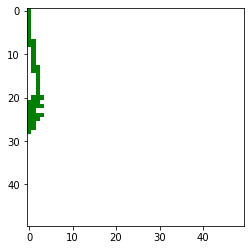

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
current_node (23, 2)
[1, 1, 2, 2, 4, 3, 1, 1, 2]
1
9
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 1]
 [1 1 1]
 [0 0 1]]
x_test [[1 1 2]
 [2 4 3]
 [1 1 2]]
blocked
next node::::  (24, 2)


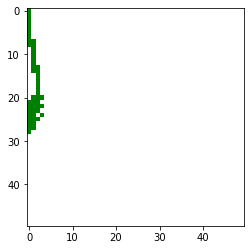

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 1)
message left


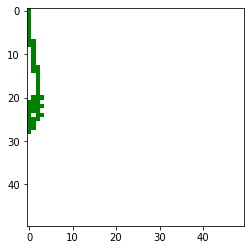

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (23, 1)
message up


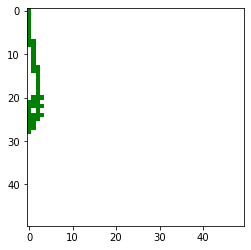

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
current_node (23, 1)
[1, 1, 1, 1, 4, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 1 1]]
blocked
next node::::  (24, 1)


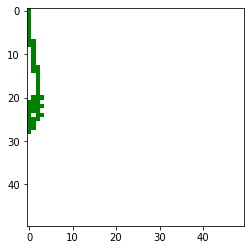

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 0)
message up


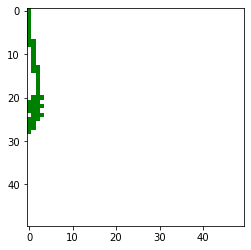

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (24, 1)
message down


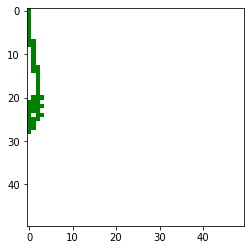

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (25, 1)
message up


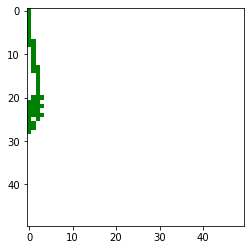

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (26, 1)
message right


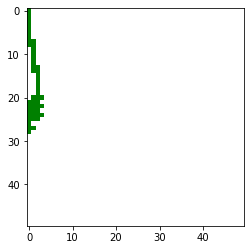

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
current_node (26, 1)
[1, 1, 2, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 3]
 [1 2 3]]
blocked
next node::::  (25, 1)


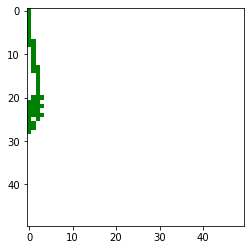

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (25, 2)
message right


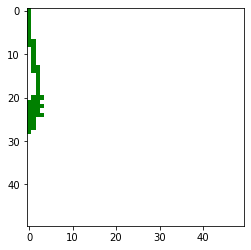

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
current_node (25, 2)
[1, 1, 2, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [1 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (25, 1)


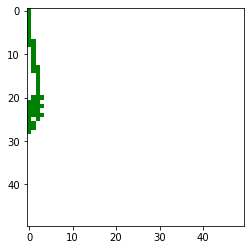

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (26, 1)
message right


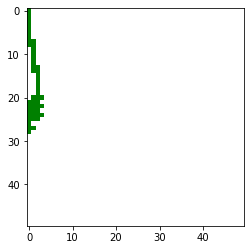

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
current_node (26, 1)
[1, 1, 2, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 3]
 [1 2 3]]
blocked
next node::::  (25, 1)


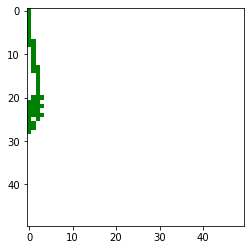

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (25, 0)
message right


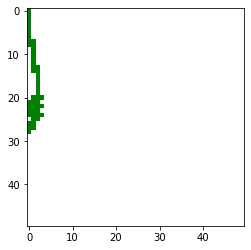

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1)]
current_node (25, 0)
[1, 1, 1, 4, 1, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [4 1 2]
 [1 2 3]]
free
predictions 0.99999976
(array([1], dtype=int64),)
next_node out (26, 0)
message down


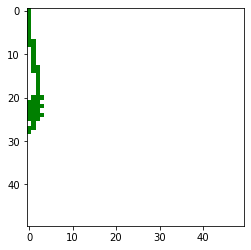

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1)]
current_node (26, 0)
[1, 1, 2, 4, 2, 3, 1, 2, 3]
1
9
neighbors [(25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2), (27, 0), (27, 1), (27, 2)]
full grid: [[0 0 1]
 [0 1 0]
 [0 1 1]]
x_test [[1 1 2]
 [4 2 3]
 [1 2 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (25, 0)
message down


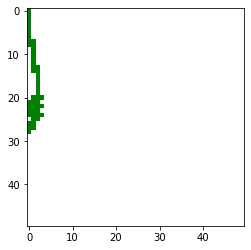

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1)]
current_node (25, 0)
[1, 1, 1, 4, 1, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [4 1 2]
 [1 2 3]]
free
predictions 0.99999976
(array([1], dtype=int64),)
next_node out (24, 0)
message down


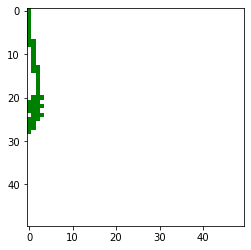

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (24, 1)
message down


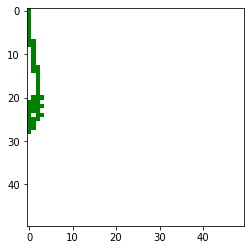

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 2)
message up


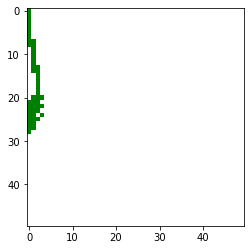

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 3)
message left


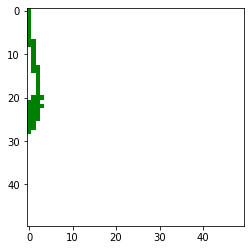

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
current_node (24, 3)
[2, 3, 3, 1, 4, 3, 2, 3, 3]
2
9
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
full grid: [[1 1 0]
 [0 1 0]
 [1 1 1]]
x_test [[2 3 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


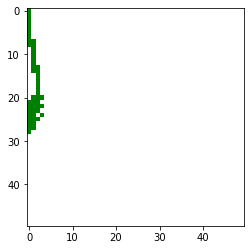

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (23, 2)
message left


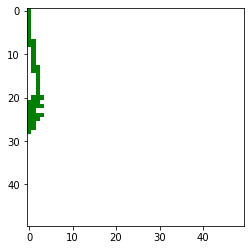

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
current_node (23, 2)
[1, 1, 2, 2, 4, 3, 1, 1, 2]
1
9
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 1]
 [1 1 1]
 [0 0 1]]
x_test [[1 1 2]
 [2 4 3]
 [1 1 2]]
blocked
next node::::  (24, 2)


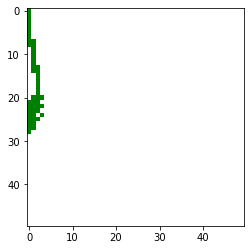

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 3)
message left


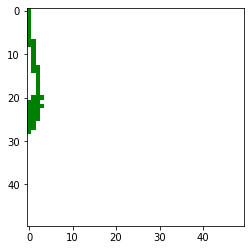

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
current_node (24, 3)
[2, 3, 3, 1, 4, 3, 2, 3, 3]
2
9
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
full grid: [[1 1 0]
 [0 1 0]
 [1 1 1]]
x_test [[2 3 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


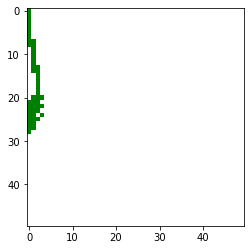

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 1)
message left


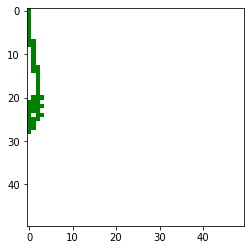

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (25, 1)
message up


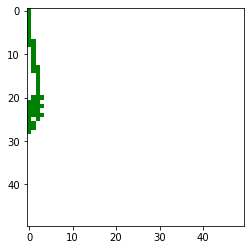

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (24, 1)
message right


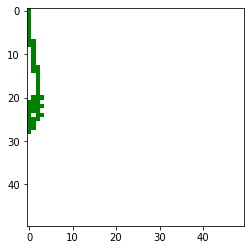

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (23, 1)
message up


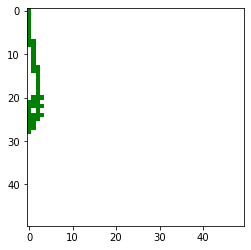

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
current_node (23, 1)
[1, 1, 1, 1, 4, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 1 1]]
blocked
next node::::  (24, 1)


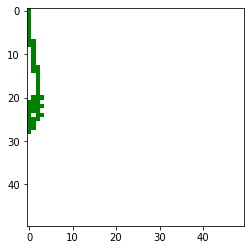

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 2)
message up


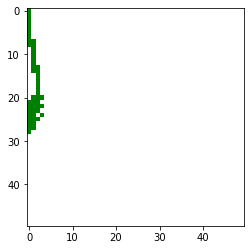

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 3)
message left


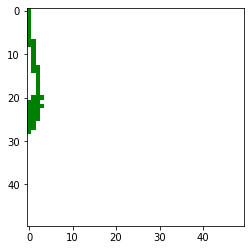

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
current_node (24, 3)
[2, 3, 3, 1, 4, 3, 2, 3, 3]
2
9
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
full grid: [[1 1 0]
 [0 1 0]
 [1 1 1]]
x_test [[2 3 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (24, 2)


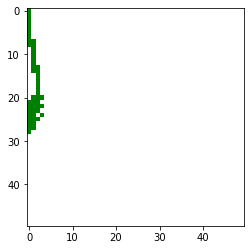

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 1)
message left


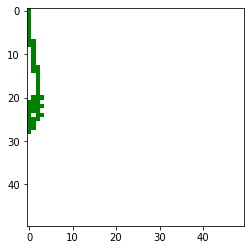

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 2)
message up


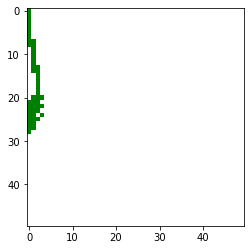

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
current_node (24, 2)
[2, 2, 3, 1, 4, 2, 1, 2, 3]
2
9
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[1 1 1]
 [0 0 1]
 [0 1 1]]
x_test [[2 2 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.9999354
(array([2], dtype=int64),)
next_node out (24, 1)
message left


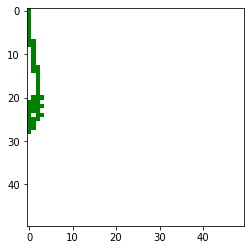

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 0)
message up


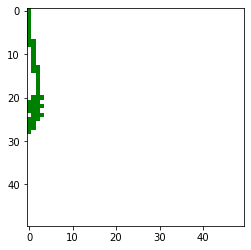

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (24, 1)
message down


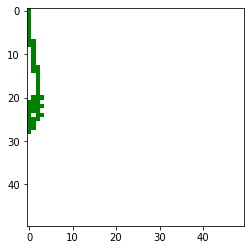

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (25, 1)
message up


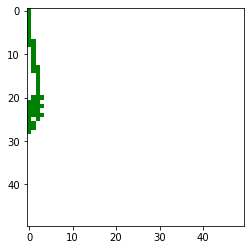

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (24, 1)
message right


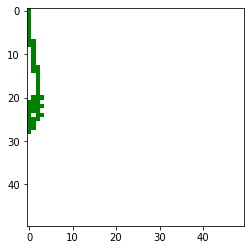

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (25, 1)
message up


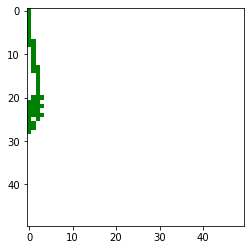

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (24, 1)
message right


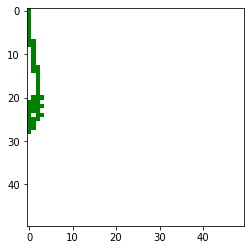

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (25, 1)
message up


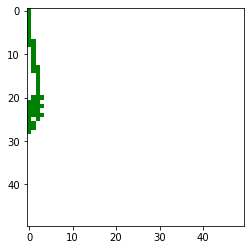

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (24, 1)
message right


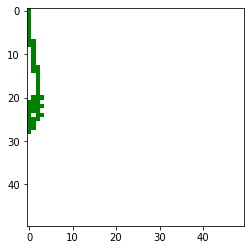

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 0)
message up


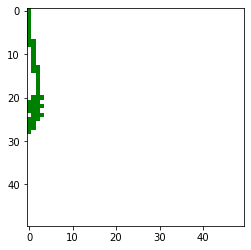

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (25, 0)
message down


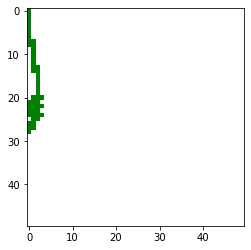

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1)]
current_node (25, 0)
[1, 1, 1, 4, 1, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [4 1 2]
 [1 2 3]]
free
predictions 0.99999976
(array([1], dtype=int64),)
next_node out (24, 0)
message down


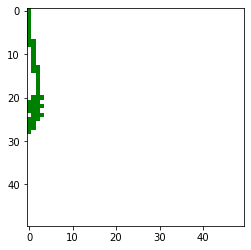

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (24, 1)
message down


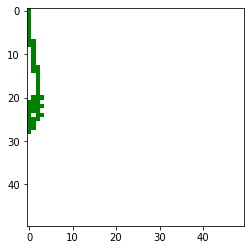

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (25, 1)
message up


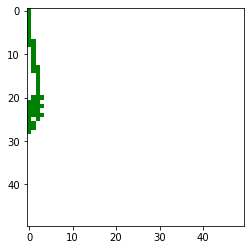

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
current_node (25, 1)
[1, 1, 1, 1, 4, 2, 1, 2, 3]
1
9
neighbors [(24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2), (26, 0), (26, 1), (26, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 2 3]]
free
predictions 0.859273
(array([3], dtype=int64),)
next_node out (24, 1)
message right


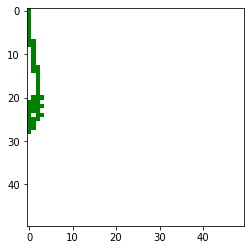

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (23, 1)
message up


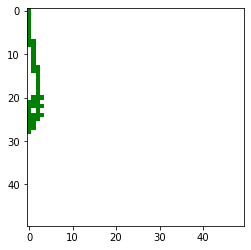

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
current_node (23, 1)
[1, 1, 1, 1, 4, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 1 1]]
blocked
next node::::  (24, 1)


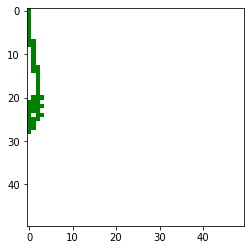

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (23, 1)
message up


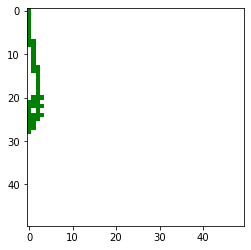

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
current_node (23, 1)
[1, 1, 1, 1, 4, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 1 1]]
blocked
next node::::  (24, 1)


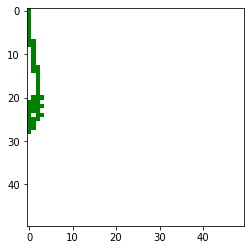

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
current_node (24, 1)
[1, 2, 2, 1, 4, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [1 4 1]
 [1 1 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (24, 0)
message up


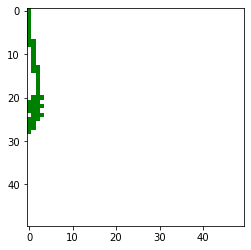

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1)]
current_node (24, 0)
[1, 2, 2, 4, 1, 1, 1, 1, 2]
1
9
neighbors [(23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2), (25, 0), (25, 1), (25, 2)]
full grid: [[0 1 1]
 [0 0 0]
 [0 0 1]]
x_test [[1 2 2]
 [4 1 1]
 [1 1 2]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (23, 0)
message down


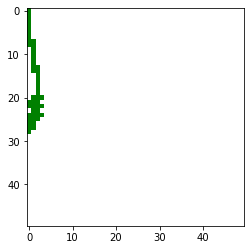

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1)]
current_node (23, 0)
[1, 1, 1, 4, 2, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [4 2 2]
 [1 1 1]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (22, 0)
message down


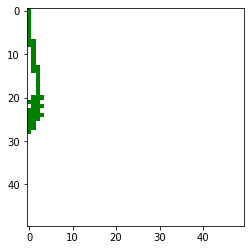

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(21, 0), (21, 1), (22, 0), (22, 1), (23, 0), (23, 1)]
current_node (22, 0)
[1, 1, 2, 4, 1, 1, 1, 2, 2]
1
9
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 1]]
x_test [[1 1 2]
 [4 1 1]
 [1 2 2]]
free
predictions 0.99968934
(array([1], dtype=int64),)
next_node out (22, 1)
message down


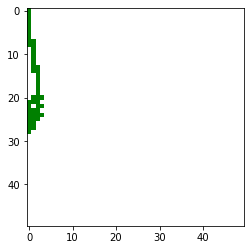

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
current_node (22, 1)
[1, 1, 2, 1, 4, 1, 1, 2, 2]
1
9
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 1]
 [1 2 2]]
free
predictions 0.98271435
(array([1], dtype=int64),)
next_node out (23, 1)
message down


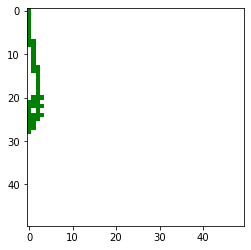

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
current_node (23, 1)
[1, 1, 1, 1, 4, 2, 1, 1, 1]
1
9
neighbors [(22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2), (24, 0), (24, 1), (24, 2)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
x_test [[1 1 1]
 [1 4 2]
 [1 1 1]]
blocked
next node::::  (22, 1)


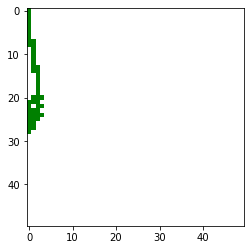

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
current_node (22, 1)
[1, 1, 2, 1, 4, 1, 1, 2, 2]
1
9
neighbors [(21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2), (23, 0), (23, 1), (23, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 1]]
x_test [[1 1 2]
 [1 4 1]
 [1 2 2]]
free
predictions 0.98271435
(array([1], dtype=int64),)
next_node out (21, 1)
message down


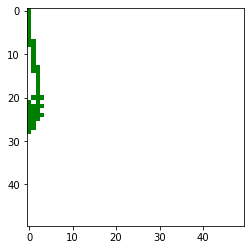

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(20, 0), (20, 1), (20, 2), (21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2)]
current_node (21, 1)
[3, 1, 1, 1, 4, 2, 1, 1, 1]
3
9
neighbors [(20, 0), (20, 1), (20, 2), (21, 0), (21, 1), (21, 2), (22, 0), (22, 1), (22, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 0 0]]
x_test [[3 1 1]
 [1 4 2]
 [1 1 1]]
free
predictions 1.0
(array([3], dtype=int64),)
next_node out (20, 1)
message right


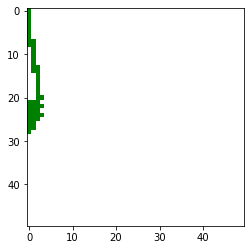

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(19, 0), (19, 1), (19, 2), (20, 0), (20, 1), (20, 2), (21, 0), (21, 1), (21, 2)]
current_node (20, 1)
[3, 3, 1, 3, 4, 1, 1, 1, 2]
3
9
neighbors [(19, 0), (19, 1), (19, 2), (20, 0), (20, 1), (20, 2), (21, 0), (21, 1), (21, 2)]
full grid: [[0 1 0]
 [0 0 0]
 [0 0 1]]
x_test [[3 3 1]
 [3 4 1]
 [1 1 2]]
free
predictions 0.6021338
(array([1], dtype=int64),)
next_node out (20, 2)
message down


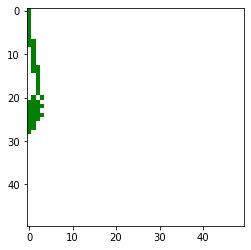

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
current_node (20, 2)
[3, 1, 3, 1, 4, 2, 1, 2, 3]
3
9
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
full grid: [[1 0 0]
 [0 0 1]
 [0 1 1]]
x_test [[3 1 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.84482604
(array([2], dtype=int64),)
next_node out (20, 3)
message left


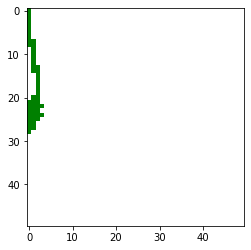

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(19, 2), (19, 3), (19, 4), (20, 2), (20, 3), (20, 4), (21, 2), (21, 3), (21, 4)]
current_node (20, 3)
[1, 3, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(19, 2), (19, 3), (19, 4), (20, 2), (20, 3), (20, 4), (21, 2), (21, 3), (21, 4)]
full grid: [[0 0 0]
 [0 1 0]
 [1 1 0]]
x_test [[1 3 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (20, 2)


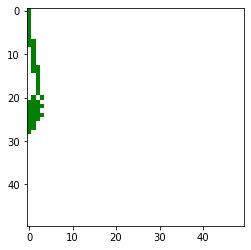

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
current_node (20, 2)
[3, 1, 3, 1, 4, 2, 1, 2, 3]
3
9
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
full grid: [[1 0 0]
 [0 0 1]
 [0 1 1]]
x_test [[3 1 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.84482604
(array([2], dtype=int64),)
next_node out (21, 2)
message left


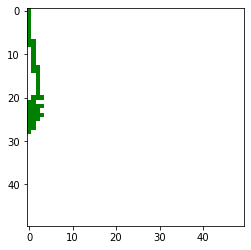

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3)]
current_node (21, 2)
[1, 1, 2, 1, 4, 3, 1, 1, 2]
1
9
neighbors [(20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3)]
full grid: [[0 0 1]
 [0 1 1]
 [0 0 1]]
x_test [[1 1 2]
 [1 4 3]
 [1 1 2]]
blocked
next node::::  (20, 2)


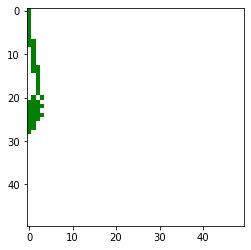

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
current_node (20, 2)
[3, 1, 3, 1, 4, 2, 1, 2, 3]
3
9
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
full grid: [[1 0 0]
 [0 0 1]
 [0 1 1]]
x_test [[3 1 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.84482604
(array([2], dtype=int64),)
next_node out (20, 3)
message left


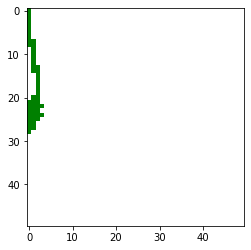

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(19, 2), (19, 3), (19, 4), (20, 2), (20, 3), (20, 4), (21, 2), (21, 3), (21, 4)]
current_node (20, 3)
[1, 3, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(19, 2), (19, 3), (19, 4), (20, 2), (20, 3), (20, 4), (21, 2), (21, 3), (21, 4)]
full grid: [[0 0 0]
 [0 1 0]
 [1 1 0]]
x_test [[1 3 3]
 [1 4 3]
 [2 3 3]]
blocked
next node::::  (20, 2)


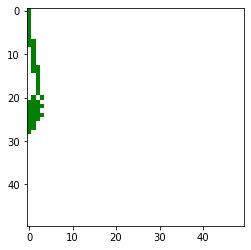

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
current_node (20, 2)
[3, 1, 3, 1, 4, 2, 1, 2, 3]
3
9
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
full grid: [[1 0 0]
 [0 0 1]
 [0 1 1]]
x_test [[3 1 3]
 [1 4 2]
 [1 2 3]]
free
predictions 0.84482604
(array([2], dtype=int64),)
next_node out (19, 2)
message left


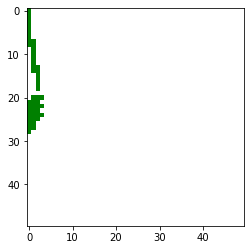

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(18, 1), (18, 2), (18, 3), (19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3)]
current_node (19, 2)
[3, 1, 3, 3, 4, 3, 1, 1, 2]
3
9
neighbors [(18, 1), (18, 2), (18, 3), (19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3)]
full grid: [[0 0 0]
 [1 0 0]
 [0 0 1]]
x_test [[3 1 3]
 [3 4 3]
 [1 1 2]]
free
predictions 1.0
(array([3], dtype=int64),)
next_node out (19, 3)
message right


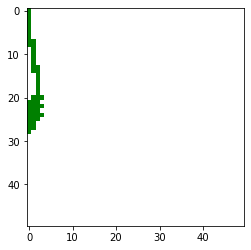

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3)]
neighbors [(18, 2), (18, 3), (18, 4), (19, 2), (19, 3), (19, 4), (20, 2), (20, 3), (20, 4)]
current_node (19, 3)
[1, 3, 3, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(18, 2), (18, 3), (18, 4), (19, 2), (19, 3), (19, 4), (20, 2), (20, 3), (20, 4)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 0]]
x_test [[1 3 3]
 [1 4 3]
 [1 2 3]]
free
predictions 0.9998197
(array([3], dtype=int64),)
next_node out (19, 4)
message right


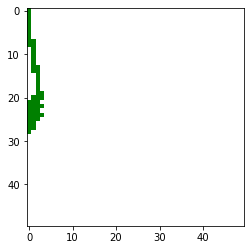

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3)]
neighbors [(18, 3), (18, 4), (18, 5), (19, 3), (19, 4), (19, 5), (20, 3), (20, 4), (20, 5)]
current_node (19, 4)
[3, 3, 3, 1, 4, 3, 2, 3, 3]
3
9
neighbors [(18, 3), (18, 4), (18, 5), (19, 3), (19, 4), (19, 5), (20, 3), (20, 4), (20, 5)]
full grid: [[0 1 0]
 [0 0 0]
 [1 0 0]]
x_test [[3 3 3]
 [1 4 3]
 [2 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (20, 4)
message down


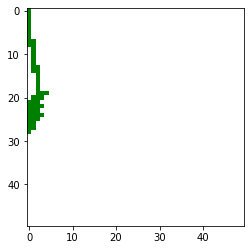

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4)]
neighbors [(19, 3), (19, 4), (19, 5), (20, 3), (20, 4), (20, 5), (21, 3), (21, 4), (21, 5)]
current_node (20, 4)
[1, 1, 3, 2, 4, 3, 3, 3, 3]
1
9
neighbors [(19, 3), (19, 4), (19, 5), (20, 3), (20, 4), (20, 5), (21, 3), (21, 4), (21, 5)]
full grid: [[0 0 0]
 [1 0 0]
 [1 0 0]]
x_test [[1 1 3]
 [2 4 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (21, 4)
message down


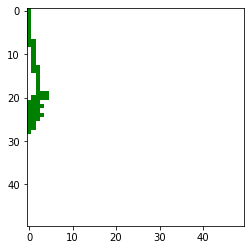

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4)]
neighbors [(20, 3), (20, 4), (20, 5), (21, 3), (21, 4), (21, 5), (22, 3), (22, 4), (22, 5)]
current_node (21, 4)
[2, 1, 3, 3, 4, 3, 2, 3, 3]
2
9
neighbors [(20, 3), (20, 4), (20, 5), (21, 3), (21, 4), (21, 5), (22, 3), (22, 4), (22, 5)]
full grid: [[1 0 0]
 [1 0 0]
 [1 0 1]]
x_test [[2 1 3]
 [3 4 3]
 [2 3 3]]
free
predictions 0.9999391
(array([1], dtype=int64),)
next_node out (22, 4)
message down


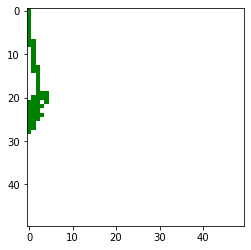

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4)]
neighbors [(21, 3), (21, 4), (21, 5), (22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5)]
current_node (22, 4)
[3, 1, 3, 2, 4, 3, 3, 3, 3]
3
9
neighbors [(21, 3), (21, 4), (21, 5), (22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5)]
full grid: [[1 0 0]
 [1 0 1]
 [1 0 1]]
x_test [[3 1 3]
 [2 4 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (23, 4)
message down


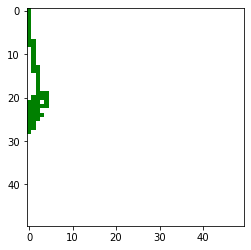

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4)]
neighbors [(22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5)]
current_node (23, 4)
[2, 1, 3, 3, 4, 3, 2, 3, 3]
2
9
neighbors [(22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5)]
full grid: [[1 0 1]
 [1 0 1]
 [1 0 0]]
x_test [[2 1 3]
 [3 4 3]
 [2 3 3]]
free
predictions 0.9999391
(array([1], dtype=int64),)
next_node out (24, 4)
message down


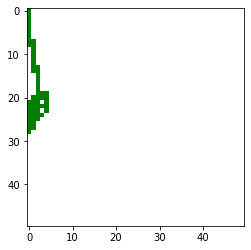

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4)]
neighbors [(23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5)]
current_node (24, 4)
[3, 1, 3, 2, 4, 3, 3, 3, 3]
3
9
neighbors [(23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5)]
full grid: [[1 0 1]
 [1 0 0]
 [1 1 1]]
x_test [[3 1 3]
 [2 4 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (25, 4)
message down


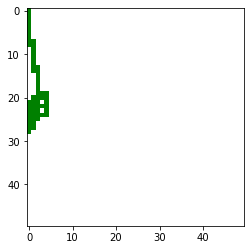

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4)]
neighbors [(24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5), (26, 3), (26, 4), (26, 5)]
current_node (25, 4)
[2, 1, 3, 3, 4, 3, 3, 3, 3]
2
9
neighbors [(24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5), (26, 3), (26, 4), (26, 5)]
full grid: [[1 0 0]
 [1 1 1]
 [1 0 0]]
x_test [[2 1 3]
 [3 4 3]
 [3 3 3]]
blocked
next node::::  (24, 4)


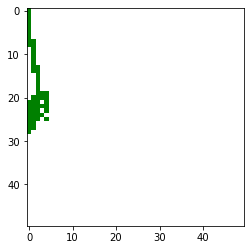

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4)]
neighbors [(23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5)]
current_node (24, 4)
[3, 1, 3, 2, 4, 3, 3, 2, 3]
3
9
neighbors [(23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5)]
full grid: [[1 0 1]
 [1 0 0]
 [1 1 1]]
x_test [[3 1 3]
 [2 4 3]
 [3 2 3]]
free
predictions 0.999974
(array([1], dtype=int64),)
next_node out (24, 3)
message down


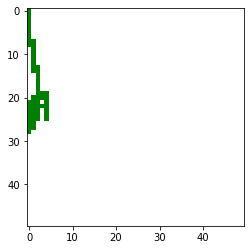

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4)]
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
current_node (24, 3)
[2, 3, 1, 1, 4, 1, 2, 3, 2]
2
9
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
full grid: [[1 1 0]
 [0 1 0]
 [1 1 1]]
x_test [[2 3 1]
 [1 4 1]
 [2 3 2]]
blocked
next node::::  (24, 4)


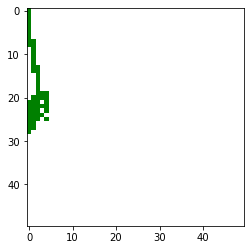

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4)]
neighbors [(23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5)]
current_node (24, 4)
[3, 1, 3, 2, 4, 3, 3, 2, 3]
3
9
neighbors [(23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5)]
full grid: [[1 0 1]
 [1 0 0]
 [1 1 1]]
x_test [[3 1 3]
 [2 4 3]
 [3 2 3]]
free
predictions 0.999974
(array([1], dtype=int64),)
next_node out (24, 5)
message down


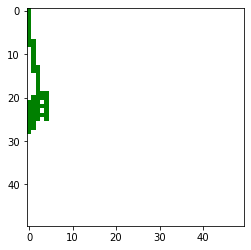

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4)]
neighbors [(23, 4), (23, 5), (23, 6), (24, 4), (24, 5), (24, 6), (25, 4), (25, 5), (25, 6)]
current_node (24, 5)
[1, 3, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(23, 4), (23, 5), (23, 6), (24, 4), (24, 5), (24, 6), (25, 4), (25, 5), (25, 6)]
full grid: [[0 1 0]
 [0 0 0]
 [1 1 0]]
x_test [[1 3 3]
 [1 4 3]
 [2 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (25, 5)
message down


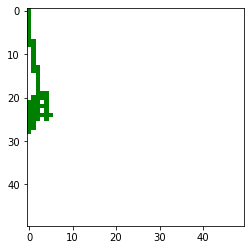

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5)]
neighbors [(24, 4), (24, 5), (24, 6), (25, 4), (25, 5), (25, 6), (26, 4), (26, 5), (26, 6)]
current_node (25, 5)
[1, 1, 3, 2, 4, 3, 3, 3, 3]
1
9
neighbors [(24, 4), (24, 5), (24, 6), (25, 4), (25, 5), (25, 6), (26, 4), (26, 5), (26, 6)]
full grid: [[0 0 0]
 [1 1 0]
 [0 0 0]]
x_test [[1 1 3]
 [2 4 3]
 [3 3 3]]
blocked
next node::::  (24, 5)


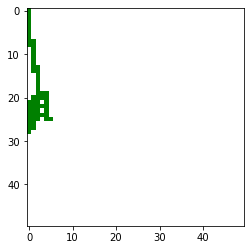

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5)]
neighbors [(23, 4), (23, 5), (23, 6), (24, 4), (24, 5), (24, 6), (25, 4), (25, 5), (25, 6)]
current_node (24, 5)
[1, 3, 3, 1, 4, 3, 2, 2, 3]
1
9
neighbors [(23, 4), (23, 5), (23, 6), (24, 4), (24, 5), (24, 6), (25, 4), (25, 5), (25, 6)]
full grid: [[0 1 0]
 [0 0 0]
 [1 1 0]]
x_test [[1 3 3]
 [1 4 3]
 [2 2 3]]
free
predictions 0.853024
(array([1], dtype=int64),)
next_node out (25, 5)
message down


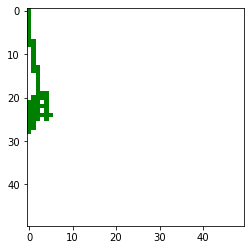

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5)]
neighbors [(24, 4), (24, 5), (24, 6), (25, 4), (25, 5), (25, 6), (26, 4), (26, 5), (26, 6)]
current_node (25, 5)
[1, 1, 3, 2, 4, 3, 3, 3, 3]
1
9
neighbors [(24, 4), (24, 5), (24, 6), (25, 4), (25, 5), (25, 6), (26, 4), (26, 5), (26, 6)]
full grid: [[0 0 0]
 [1 1 0]
 [0 0 0]]
x_test [[1 1 3]
 [2 4 3]
 [3 3 3]]
blocked
next node::::  (24, 5)


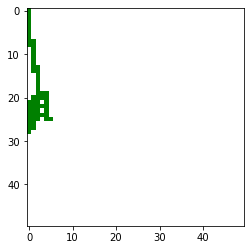

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5)]
neighbors [(23, 4), (23, 5), (23, 6), (24, 4), (24, 5), (24, 6), (25, 4), (25, 5), (25, 6)]
current_node (24, 5)
[1, 3, 3, 1, 4, 3, 2, 2, 3]
1
9
neighbors [(23, 4), (23, 5), (23, 6), (24, 4), (24, 5), (24, 6), (25, 4), (25, 5), (25, 6)]
full grid: [[0 1 0]
 [0 0 0]
 [1 1 0]]
x_test [[1 3 3]
 [1 4 3]
 [2 2 3]]
free
predictions 0.853024
(array([1], dtype=int64),)
next_node out (24, 4)
message down


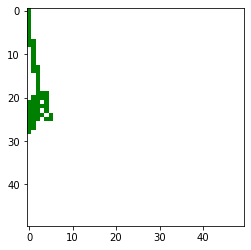

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5)]
neighbors [(23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5)]
current_node (24, 4)
[3, 1, 3, 2, 4, 1, 3, 2, 2]
3
9
neighbors [(23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5)]
full grid: [[1 0 1]
 [1 0 0]
 [1 1 1]]
x_test [[3 1 3]
 [2 4 1]
 [3 2 2]]
free
predictions 0.9994179
(array([1], dtype=int64),)
next_node out (24, 3)
message down


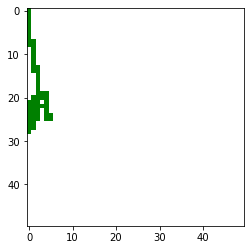

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5)]
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
current_node (24, 3)
[2, 3, 1, 1, 4, 1, 2, 3, 2]
2
9
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
full grid: [[1 1 0]
 [0 1 0]
 [1 1 1]]
x_test [[2 3 1]
 [1 4 1]
 [2 3 2]]
blocked
next node::::  (24, 4)


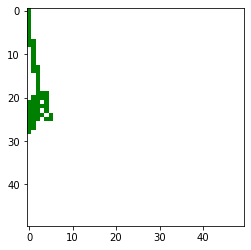

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5)]
neighbors [(23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5)]
current_node (24, 4)
[3, 1, 3, 2, 4, 1, 3, 2, 2]
3
9
neighbors [(23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5)]
full grid: [[1 0 1]
 [1 0 0]
 [1 1 1]]
x_test [[3 1 3]
 [2 4 1]
 [3 2 2]]
free
predictions 0.9994179
(array([1], dtype=int64),)
next_node out (24, 3)
message down


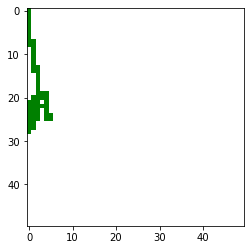

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5)]
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
current_node (24, 3)
[2, 3, 1, 1, 4, 1, 2, 3, 2]
2
9
neighbors [(23, 2), (23, 3), (23, 4), (24, 2), (24, 3), (24, 4), (25, 2), (25, 3), (25, 4)]
full grid: [[1 1 0]
 [0 1 0]
 [1 1 1]]
x_test [[2 3 1]
 [1 4 1]
 [2 3 2]]
blocked
next node::::  (24, 4)


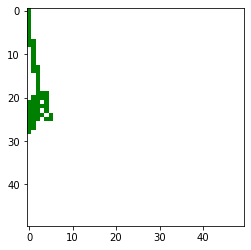

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5)]
neighbors [(23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5)]
current_node (24, 4)
[3, 1, 3, 2, 4, 1, 3, 2, 2]
3
9
neighbors [(23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5), (25, 3), (25, 4), (25, 5)]
full grid: [[1 0 1]
 [1 0 0]
 [1 1 1]]
x_test [[3 1 3]
 [2 4 1]
 [3 2 2]]
free
predictions 0.9994179
(array([1], dtype=int64),)
next_node out (23, 4)
message down


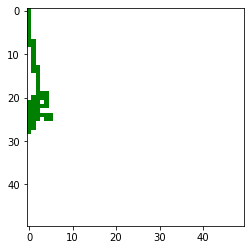

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5)]
neighbors [(22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5)]
current_node (23, 4)
[2, 1, 3, 3, 4, 3, 2, 1, 1]
2
9
neighbors [(22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5)]
full grid: [[1 0 1]
 [1 0 1]
 [1 0 0]]
x_test [[2 1 3]
 [3 4 3]
 [2 1 1]]
free
predictions 1.0
(array([3], dtype=int64),)
next_node out (23, 5)
message right


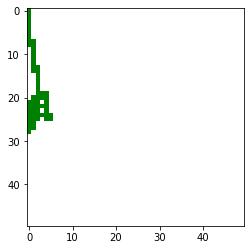

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5)]
neighbors [(22, 4), (22, 5), (22, 6), (23, 4), (23, 5), (23, 6), (24, 4), (24, 5), (24, 6)]
current_node (23, 5)
[1, 3, 3, 1, 4, 3, 1, 1, 3]
1
9
neighbors [(22, 4), (22, 5), (22, 6), (23, 4), (23, 5), (23, 6), (24, 4), (24, 5), (24, 6)]
full grid: [[0 1 1]
 [0 1 0]
 [0 0 0]]
x_test [[1 3 3]
 [1 4 3]
 [1 1 3]]
blocked
next node::::  (23, 4)


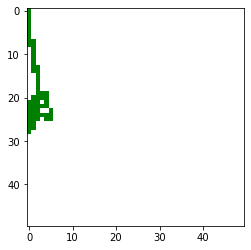

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5)]
neighbors [(22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5)]
current_node (23, 4)
[2, 1, 3, 3, 4, 2, 2, 1, 1]
2
9
neighbors [(22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5)]
full grid: [[1 0 1]
 [1 0 1]
 [1 0 0]]
x_test [[2 1 3]
 [3 4 2]
 [2 1 1]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (23, 5)
message down


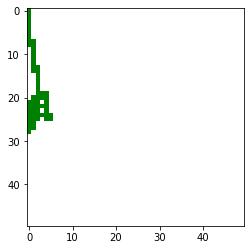

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5)]
neighbors [(22, 4), (22, 5), (22, 6), (23, 4), (23, 5), (23, 6), (24, 4), (24, 5), (24, 6)]
current_node (23, 5)
[1, 3, 3, 1, 4, 3, 1, 1, 3]
1
9
neighbors [(22, 4), (22, 5), (22, 6), (23, 4), (23, 5), (23, 6), (24, 4), (24, 5), (24, 6)]
full grid: [[0 1 1]
 [0 1 0]
 [0 0 0]]
x_test [[1 3 3]
 [1 4 3]
 [1 1 3]]
blocked
next node::::  (23, 4)


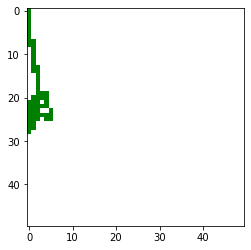

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5)]
neighbors [(22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5)]
current_node (23, 4)
[2, 1, 3, 3, 4, 2, 2, 1, 1]
2
9
neighbors [(22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5), (24, 3), (24, 4), (24, 5)]
full grid: [[1 0 1]
 [1 0 1]
 [1 0 0]]
x_test [[2 1 3]
 [3 4 2]
 [2 1 1]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (22, 4)
message down


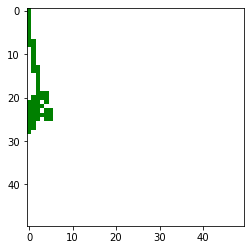

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5)]
neighbors [(21, 3), (21, 4), (21, 5), (22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5)]
current_node (22, 4)
[3, 1, 3, 2, 4, 3, 3, 1, 2]
3
9
neighbors [(21, 3), (21, 4), (21, 5), (22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5)]
full grid: [[1 0 0]
 [1 0 1]
 [1 0 1]]
x_test [[3 1 3]
 [2 4 3]
 [3 1 2]]
free
predictions 1.0
(array([3], dtype=int64),)
next_node out (22, 5)
message right


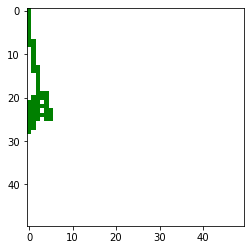

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5)]
neighbors [(21, 4), (21, 5), (21, 6), (22, 4), (22, 5), (22, 6), (23, 4), (23, 5), (23, 6)]
current_node (22, 5)
[1, 3, 3, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(21, 4), (21, 5), (21, 6), (22, 4), (22, 5), (22, 6), (23, 4), (23, 5), (23, 6)]
full grid: [[0 0 0]
 [0 1 1]
 [0 1 0]]
x_test [[1 3 3]
 [1 4 3]
 [1 2 3]]
blocked
next node::::  (22, 4)


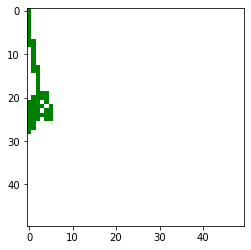

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5)]
neighbors [(21, 3), (21, 4), (21, 5), (22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5)]
current_node (22, 4)
[3, 1, 3, 2, 4, 2, 3, 1, 2]
3
9
neighbors [(21, 3), (21, 4), (21, 5), (22, 3), (22, 4), (22, 5), (23, 3), (23, 4), (23, 5)]
full grid: [[1 0 0]
 [1 0 1]
 [1 0 1]]
x_test [[3 1 3]
 [2 4 2]
 [3 1 2]]
free
predictions 0.99999976
(array([0], dtype=int64),)
next_node out (21, 4)
message up


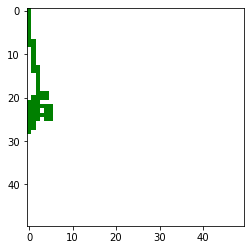

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5)]
neighbors [(20, 3), (20, 4), (20, 5), (21, 3), (21, 4), (21, 5), (22, 3), (22, 4), (22, 5)]
current_node (21, 4)
[2, 1, 3, 3, 4, 3, 2, 1, 2]
2
9
neighbors [(20, 3), (20, 4), (20, 5), (21, 3), (21, 4), (21, 5), (22, 3), (22, 4), (22, 5)]
full grid: [[1 0 0]
 [1 0 0]
 [1 0 1]]
x_test [[2 1 3]
 [3 4 3]
 [2 1 2]]
free
predictions 1.0
(array([3], dtype=int64),)
next_node out (21, 5)
message right


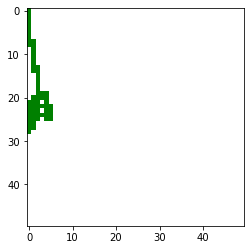

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5)]
neighbors [(20, 4), (20, 5), (20, 6), (21, 4), (21, 5), (21, 6), (22, 4), (22, 5), (22, 6)]
current_node (21, 5)
[1, 3, 3, 1, 4, 3, 1, 2, 3]
1
9
neighbors [(20, 4), (20, 5), (20, 6), (21, 4), (21, 5), (21, 6), (22, 4), (22, 5), (22, 6)]
full grid: [[0 0 0]
 [0 0 0]
 [0 1 1]]
x_test [[1 3 3]
 [1 4 3]
 [1 2 3]]
free
predictions 0.9998197
(array([3], dtype=int64),)
next_node out (21, 6)
message right


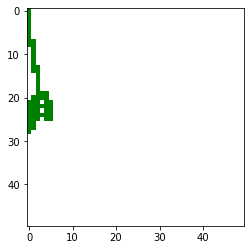

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5)]
neighbors [(20, 5), (20, 6), (20, 7), (21, 5), (21, 6), (21, 7), (22, 5), (22, 6), (22, 7)]
current_node (21, 6)
[3, 3, 3, 1, 4, 3, 2, 3, 3]
3
9
neighbors [(20, 5), (20, 6), (20, 7), (21, 5), (21, 6), (21, 7), (22, 5), (22, 6), (22, 7)]
full grid: [[0 0 0]
 [0 0 0]
 [1 1 0]]
x_test [[3 3 3]
 [1 4 3]
 [2 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (22, 6)
message down


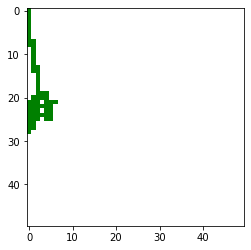

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6)]
neighbors [(21, 5), (21, 6), (21, 7), (22, 5), (22, 6), (22, 7), (23, 5), (23, 6), (23, 7)]
current_node (22, 6)
[1, 1, 3, 2, 4, 3, 2, 3, 3]
1
9
neighbors [(21, 5), (21, 6), (21, 7), (22, 5), (22, 6), (22, 7), (23, 5), (23, 6), (23, 7)]
full grid: [[0 0 0]
 [1 1 0]
 [1 0 0]]
x_test [[1 1 3]
 [2 4 3]
 [2 3 3]]
blocked
next node::::  (21, 6)


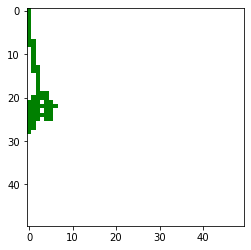

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6)]
neighbors [(20, 5), (20, 6), (20, 7), (21, 5), (21, 6), (21, 7), (22, 5), (22, 6), (22, 7)]
current_node (21, 6)
[3, 3, 3, 1, 4, 3, 2, 2, 3]
3
9
neighbors [(20, 5), (20, 6), (20, 7), (21, 5), (21, 6), (21, 7), (22, 5), (22, 6), (22, 7)]
full grid: [[0 0 0]
 [0 0 0]
 [1 1 0]]
x_test [[3 3 3]
 [1 4 3]
 [2 2 3]]
free
predictions 0.94649124
(array([1], dtype=int64),)
next_node out (21, 5)
message down


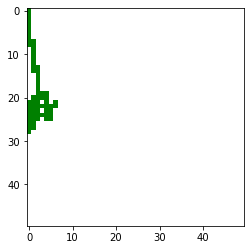

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6)]
neighbors [(20, 4), (20, 5), (20, 6), (21, 4), (21, 5), (21, 6), (22, 4), (22, 5), (22, 6)]
current_node (21, 5)
[1, 3, 3, 1, 4, 1, 1, 2, 2]
1
9
neighbors [(20, 4), (20, 5), (20, 6), (21, 4), (21, 5), (21, 6), (22, 4), (22, 5), (22, 6)]
full grid: [[0 0 0]
 [0 0 0]
 [0 1 1]]
x_test [[1 3 3]
 [1 4 1]
 [1 2 2]]
free
predictions 1.0
(array([0], dtype=int64),)
next_node out (20, 5)
message up


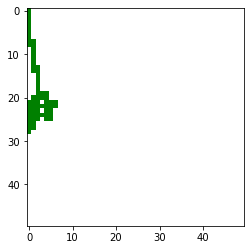

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6)]
neighbors [(19, 4), (19, 5), (19, 6), (20, 4), (20, 5), (20, 6), (21, 4), (21, 5), (21, 6)]
current_node (20, 5)
[1, 3, 3, 1, 4, 3, 1, 1, 1]
1
9
neighbors [(19, 4), (19, 5), (19, 6), (20, 4), (20, 5), (20, 6), (21, 4), (21, 5), (21, 6)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
x_test [[1 3 3]
 [1 4 3]
 [1 1 1]]
free
predictions 1.0
(array([3], dtype=int64),)
next_node out (20, 6)
message right


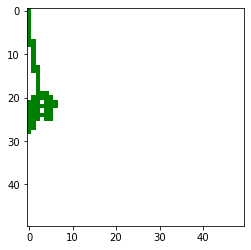

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5)]
neighbors [(19, 5), (19, 6), (19, 7), (20, 5), (20, 6), (20, 7), (21, 5), (21, 6), (21, 7)]
current_node (20, 6)
[3, 3, 3, 1, 4, 3, 1, 1, 3]
3
9
neighbors [(19, 5), (19, 6), (19, 7), (20, 5), (20, 6), (20, 7), (21, 5), (21, 6), (21, 7)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
x_test [[3 3 3]
 [1 4 3]
 [1 1 3]]
free
predictions 1.0
(array([3], dtype=int64),)
next_node out (20, 7)
message right


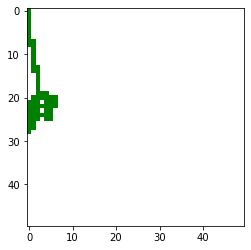

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6)]
neighbors [(19, 6), (19, 7), (19, 8), (20, 6), (20, 7), (20, 8), (21, 6), (21, 7), (21, 8)]
current_node (20, 7)
[3, 3, 3, 1, 4, 3, 1, 3, 3]
3
9
neighbors [(19, 6), (19, 7), (19, 8), (20, 6), (20, 7), (20, 8), (21, 6), (21, 7), (21, 8)]
full grid: [[0 0 0]
 [0 0 1]
 [0 0 1]]
x_test [[3 3 3]
 [1 4 3]
 [1 3 3]]
free
predictions 0.98860264
(array([1], dtype=int64),)
next_node out (21, 7)
message down


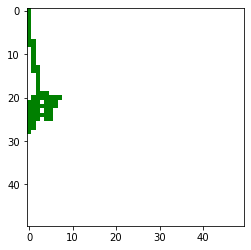

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7)]
neighbors [(20, 6), (20, 7), (20, 8), (21, 6), (21, 7), (21, 8), (22, 6), (22, 7), (22, 8)]
current_node (21, 7)
[1, 1, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(20, 6), (20, 7), (20, 8), (21, 6), (21, 7), (21, 8), (22, 6), (22, 7), (22, 8)]
full grid: [[0 0 1]
 [0 0 1]
 [1 0 0]]
x_test [[1 1 3]
 [1 4 3]
 [2 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (22, 7)
message down


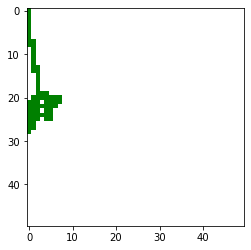

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7)]
neighbors [(21, 6), (21, 7), (21, 8), (22, 6), (22, 7), (22, 8), (23, 6), (23, 7), (23, 8)]
current_node (22, 7)
[1, 1, 3, 2, 4, 3, 3, 3, 3]
1
9
neighbors [(21, 6), (21, 7), (21, 8), (22, 6), (22, 7), (22, 8), (23, 6), (23, 7), (23, 8)]
full grid: [[0 0 1]
 [1 0 0]
 [0 0 0]]
x_test [[1 1 3]
 [2 4 3]
 [3 3 3]]
free
predictions 1.0
(array([1], dtype=int64),)
next_node out (23, 7)
message down


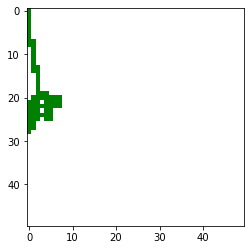

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7)]
neighbors [(22, 6), (22, 7), (22, 8), (23, 6), (23, 7), (23, 8), (24, 6), (24, 7), (24, 8)]
current_node (23, 7)
[2, 1, 3, 3, 4, 3, 3, 3, 3]
2
9
neighbors [(22, 6), (22, 7), (22, 8), (23, 6), (23, 7), (23, 8), (24, 6), (24, 7), (24, 8)]
full grid: [[1 0 0]
 [0 0 0]
 [0 0 0]]
x_test [[2 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.9997472
(array([1], dtype=int64),)
next_node out (24, 7)
mes

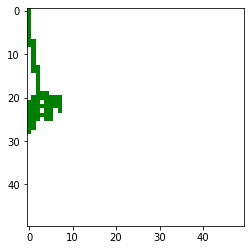

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7)]
neighbors [(23, 6), (23, 7), (23, 8), (24, 6), (24, 7), (24, 8), (25, 6), (25, 7), (25, 8)]
current_node (24, 7)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(23, 6), (23, 7), (23, 8), (24, 6), (24, 7), (24, 8), (25, 6), (25, 7), (25, 8)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 1]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.99844617
(array([1], dtype=int64),)
next_node out (

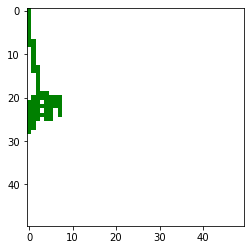

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7)]
neighbors [(24, 6), (24, 7), (24, 8), (25, 6), (25, 7), (25, 8), (26, 6), (26, 7), (26, 8)]
current_node (25, 7)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(24, 6), (24, 7), (24, 8), (25, 6), (25, 7), (25, 8), (26, 6), (26, 7), (26, 8)]
full grid: [[0 0 0]
 [0 0 1]
 [0 0 0]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.99844617
(array([1], dtype=int64),)
next_n

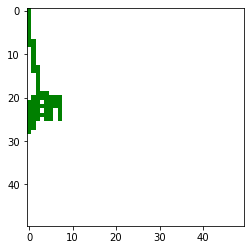

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7)]
neighbors [(25, 6), (25, 7), (25, 8), (26, 6), (26, 7), (26, 8), (27, 6), (27, 7), (27, 8)]
current_node (26, 7)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(25, 6), (25, 7), (25, 8), (26, 6), (26, 7), (26, 8), (27, 6), (27, 7), (27, 8)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 0]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
free
predictions 0.99844617
(array([1], dtype=int64)

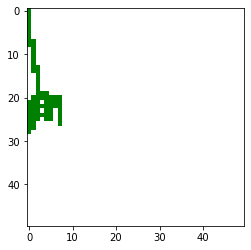

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7)]
neighbors [(26, 6), (26, 7), (26, 8), (27, 6), (27, 7), (27, 8), (28, 6), (28, 7), (28, 8)]
current_node (27, 7)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(26, 6), (26, 7), (26, 8), (27, 6), (27, 7), (27, 8), (28, 6), (28, 7), (28, 8)]
full grid: [[0 0 0]
 [0 1 0]
 [0 0 1]]
x_test [[3 1 3]
 [3 4 3]
 [3 3 3]]
blocked
next node::::  (26, 7)


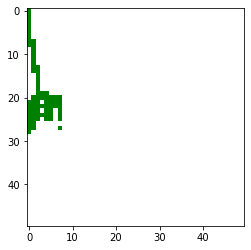

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7)]
neighbors [(25, 6), (25, 7), (25, 8), (26, 6), (26, 7), (26, 8), (27, 6), (27, 7), (27, 8)]
current_node (26, 7)
[3, 1, 3, 3, 4, 3, 3, 2, 3]
3
9
neighbors [(25, 6), (25, 7), (25, 8), (26, 6), (26, 7), (26, 8), (27, 6), (27, 7), (27, 8)]
full grid: [[0 0 1]
 [0 0 0]
 [0 1 0]]
x_test [[3 1 3]
 [3 4 3]
 [3 2 3]]
free
predictions 0.97941375
(array

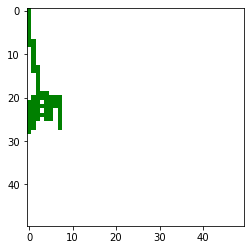

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7)]
neighbors [(25, 7), (25, 8), (25, 9), (26, 7), (26, 8), (26, 9), (27, 7), (27, 8), (27, 9)]
current_node (26, 8)
[1, 3, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(25, 7), (25, 8), (25, 9), (26, 7), (26, 8), (26, 9), (27, 7), (27, 8), (27, 9)]
full grid: [[0 1 0]
 [0 0 1]
 [1 0 0]]
x_test [[1 3 3]
 [1 4 3]
 [2 3 3]]
free
predictions 1.0
(array([1], d

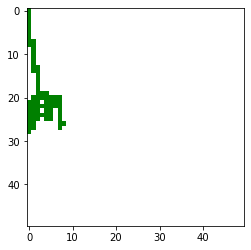

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8)]
neighbors [(26, 7), (26, 8), (26, 9), (27, 7), (27, 8), (27, 9), (28, 7), (28, 8), (28, 9)]
current_node (27, 8)
[1, 1, 3, 2, 4, 3, 3, 3, 3]
1
9
neighbors [(26, 7), (26, 8), (26, 9), (27, 7), (27, 8), (27, 9), (28, 7), (28, 8), (28, 9)]
full grid: [[0 0 1]
 [1 0 0]
 [0 1 0]]
x_test [[1 1 3]
 [2 4 3]
 [3 3 3]]
free
predictions 1.0
(arr

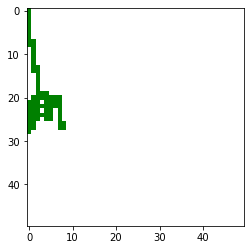

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8)]
neighbors [(27, 7), (27, 8), (27, 9), (28, 7), (28, 8), (28, 9), (29, 7), (29, 8), (29, 9)]
current_node (28, 8)
[2, 1, 3, 3, 4, 3, 3, 3, 3]
2
9
neighbors [(27, 7), (27, 8), (27, 9), (28, 7), (28, 8), (28, 9), (29, 7), (29, 8), (29, 9)]
full grid: [[1 0 0]
 [0 1 0]
 [0 0 0]]
x_test [[2 1 3]
 [3 4 3]
 [3 3 3]]
blocked
next nod

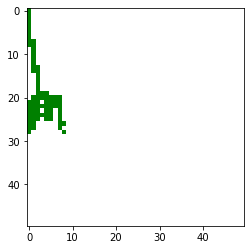

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8)]
neighbors [(26, 7), (26, 8), (26, 9), (27, 7), (27, 8), (27, 9), (28, 7), (28, 8), (28, 9)]
current_node (27, 8)
[1, 1, 3, 2, 4, 3, 3, 2, 3]
1
9
neighbors [(26, 7), (26, 8), (26, 9), (27, 7), (27, 8), (27, 9), (28, 7), (28, 8), (28, 9)]
full grid: [[0 0 1]
 [1 0 0]
 [0 1 0]]
x_test [[1 1 3]
 [2 4 3]
 [3 2 3]]
free
pr

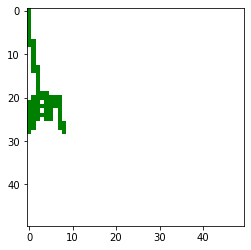

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8)]
neighbors [(26, 8), (26, 9), (26, 10), (27, 8), (27, 9), (27, 10), (28, 8), (28, 9), (28, 10)]
current_node (27, 9)
[1, 3, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(26, 8), (26, 9), (26, 10), (27, 8), (27, 9), (27, 10), (28, 8), (28, 9), (28, 10)]
full grid: [[0 1 0]
 [0 0 0]
 [1 0 0]]
x_test [[1 3 3]
 [1 4 3]
 [2 3 3]]
f

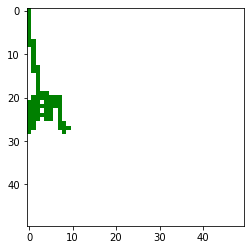

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9)]
neighbors [(27, 8), (27, 9), (27, 10), (28, 8), (28, 9), (28, 10), (29, 8), (29, 9), (29, 10)]
current_node (28, 9)
[1, 1, 3, 2, 4, 3, 3, 3, 3]
1
9
neighbors [(27, 8), (27, 9), (27, 10), (28, 8), (28, 9), (28, 10), (29, 8), (29, 9), (29, 10)]
full grid: [[0 0 0]
 [1 0 0]
 [0 0 0]]
x_test [[1 1 3]
 [2 4 3]
 [

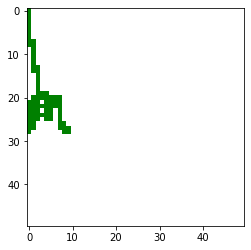

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9)]
neighbors [(28, 8), (28, 9), (28, 10), (29, 8), (29, 9), (29, 10), (30, 8), (30, 9), (30, 10)]
current_node (29, 9)
[2, 1, 3, 3, 4, 3, 3, 3, 3]
2
9
neighbors [(28, 8), (28, 9), (28, 10), (29, 8), (29, 9), (29, 10), (30, 8), (30, 9), (30, 10)]
full grid: [[1 0 0]
 [0 0 0]
 [1 0 1]]
x_test [[2 1 3]
 [

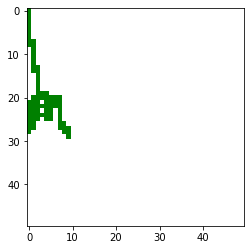

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9)]
neighbors [(29, 8), (29, 9), (29, 10), (30, 8), (30, 9), (30, 10), (31, 8), (31, 9), (31, 10)]
current_node (30, 9)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(29, 8), (29, 9), (29, 10), (30, 8), (30, 9), (30, 10), (31, 8), (31, 9), (31, 10)]
full grid: [[0 0 0]
 [1 0 1]
 [0 0 0]]
x_test [[

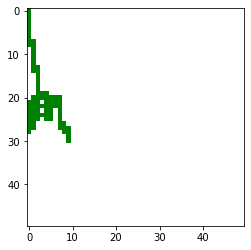

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9)]
neighbors [(30, 8), (30, 9), (30, 10), (31, 8), (31, 9), (31, 10), (32, 8), (32, 9), (32, 10)]
current_node (31, 9)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(30, 8), (30, 9), (30, 10), (31, 8), (31, 9), (31, 10), (32, 8), (32, 9), (32, 10)]
full grid: [[1 0 1]
 [0 0 0]
 [0 0 0]]


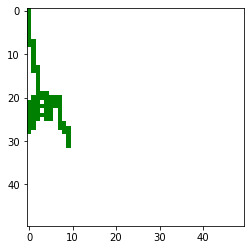

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9)]
neighbors [(31, 8), (31, 9), (31, 10), (32, 8), (32, 9), (32, 10), (33, 8), (33, 9), (33, 10)]
current_node (32, 9)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(31, 8), (31, 9), (31, 10), (32, 8), (32, 9), (32, 10), (33, 8), (33, 9), (33, 10)]
full grid: [[0 0 0]
 [0 0 0]
 

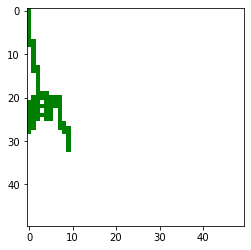

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9)]
neighbors [(32, 8), (32, 9), (32, 10), (33, 8), (33, 9), (33, 10), (34, 8), (34, 9), (34, 10)]
current_node (33, 9)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(32, 8), (32, 9), (32, 10), (33, 8), (33, 9), (33, 10), (34, 8), (34, 9), (34, 10)]
full grid: [[0 0 0]
 

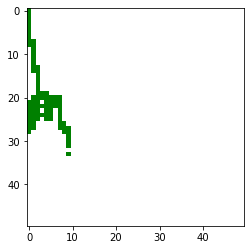

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9)]
neighbors [(31, 8), (31, 9), (31, 10), (32, 8), (32, 9), (32, 10), (33, 8), (33, 9), (33, 10)]
current_node (32, 9)
[3, 1, 3, 3, 4, 3, 3, 2, 3]
3
9
neighbors [(31, 8), (31, 9), (31, 10), (32, 8), (32, 9), (32, 10), (33, 8), (33, 9), (33, 10)]
full grid: [

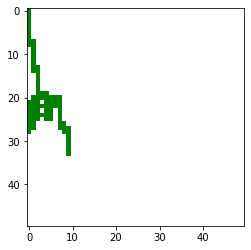

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9)]
neighbors [(31, 9), (31, 10), (31, 11), (32, 9), (32, 10), (32, 11), (33, 9), (33, 10), (33, 11)]
current_node (32, 10)
[1, 3, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(31, 9), (31, 10), (31, 11), (32, 9), (32, 10), (32, 11), (33, 9), (33, 10), (33, 11)]
full 

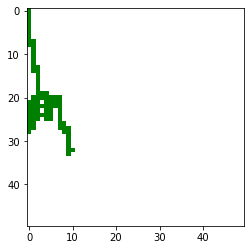

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10)]
neighbors [(32, 9), (32, 10), (32, 11), (33, 9), (33, 10), (33, 11), (34, 9), (34, 10), (34, 11)]
current_node (33, 10)
[1, 1, 3, 2, 4, 3, 3, 3, 3]
1
9
neighbors [(32, 9), (32, 10), (32, 11), (33, 9), (33, 10), (33, 11), (34, 9), (34, 10), (34, 

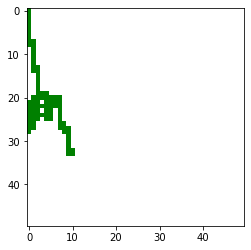

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10)]
neighbors [(33, 9), (33, 10), (33, 11), (34, 9), (34, 10), (34, 11), (35, 9), (35, 10), (35, 11)]
current_node (34, 10)
[2, 1, 3, 3, 4, 3, 3, 3, 3]
2
9
neighbors [(33, 9), (33, 10), (33, 11), (34, 9), (34, 10), (34, 11), (35, 9), (35, 

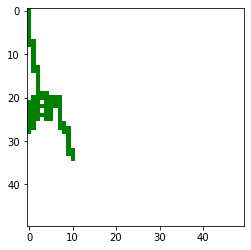

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10)]
neighbors [(34, 9), (34, 10), (34, 11), (35, 9), (35, 10), (35, 11), (36, 9), (36, 10), (36, 11)]
current_node (35, 10)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(34, 9), (34, 10), (34, 11), (35, 9), (35, 10), (35, 11), (36,

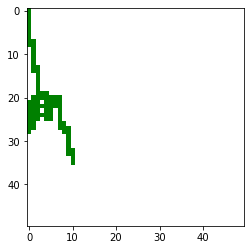

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10)]
neighbors [(35, 9), (35, 10), (35, 11), (36, 9), (36, 10), (36, 11), (37, 9), (37, 10), (37, 11)]
current_node (36, 10)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(35, 9), (35, 10), (35, 11), (36, 9), (36, 10), (36,

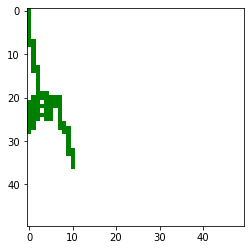

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10)]
neighbors [(36, 9), (36, 10), (36, 11), (37, 9), (37, 10), (37, 11), (38, 9), (38, 10), (38, 11)]
current_node (37, 10)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(36, 9), (36, 10), (36, 11), (37, 9), (37,

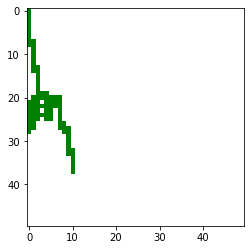

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10)]
neighbors [(37, 9), (37, 10), (37, 11), (38, 9), (38, 10), (38, 11), (39, 9), (39, 10), (39, 11)]
current_node (38, 10)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9
neighbors [(37, 9), (37, 10), (37, 11), (38

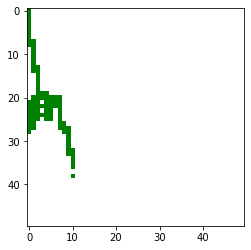

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10)]
neighbors [(36, 9), (36, 10), (36, 11), (37, 9), (37, 10), (37, 11), (38, 9), (38, 10), (38, 11)]
current_node (37, 10)
[3, 1, 3, 3, 4, 3, 3, 2, 3]
3
9
neighbors [(36, 9), (36, 10), (36

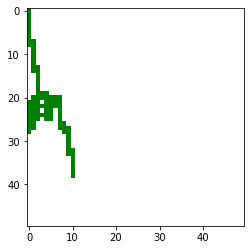

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10)]
neighbors [(36, 10), (36, 11), (36, 12), (37, 10), (37, 11), (37, 12), (38, 10), (38, 11), (38, 12)]
current_node (37, 11)
[1, 3, 3, 1, 4, 3, 2, 3, 3]
1
9
neighbors [(36, 10), (36, 11),

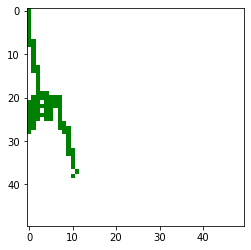

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11)]
neighbors [(36, 9), (36, 10), (36, 11), (37, 9), (37, 10), (37, 11), (38, 9), (38, 10), (38, 11)]
current_node (37, 10)
[3, 1, 3, 3, 4, 2, 3, 2, 3]
3
9
neighbors [(36, 9), (36

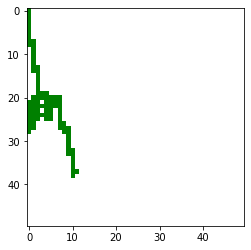

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11)]
neighbors [(36, 8), (36, 9), (36, 10), (37, 8), (37, 9), (37, 10), (38, 8), (38, 9), (38, 10)]
current_node (37, 9)
[3, 3, 1, 3, 4, 1, 3, 3, 2]
3
9
neighbors [(36, 8), (36, 9)

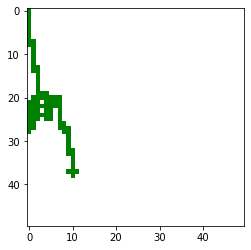

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9)]
neighbors [(37, 8), (37, 9), (37, 10), (38, 8), (38, 9), (38, 10), (39, 8), (39, 9), (39, 10)]
current_node (38, 9)
[3, 1, 1, 3, 4, 2, 3, 3, 3]
3
9
neighbors [(37, 8)

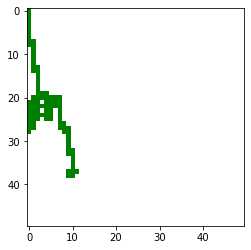

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9)]
neighbors [(38, 8), (38, 9), (38, 10), (39, 8), (39, 9), (39, 10), (40, 8), (40, 9), (40, 10)]
current_node (39, 9)
[3, 1, 2, 3, 4, 3, 3, 3, 3]
3
9
neighbors

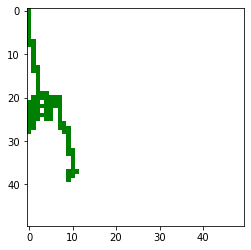

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9)]
neighbors [(39, 8), (39, 9), (39, 10), (40, 8), (40, 9), (40, 10), (41, 8), (41, 9), (41, 10)]
current_node (40, 9)
[3, 1, 3, 3, 4, 3, 3, 3, 3]
3
9


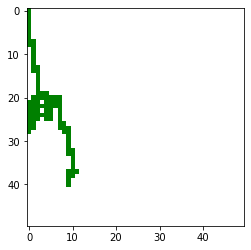

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9)]
neighbors [(40, 8), (40, 9), (40, 10), (41, 8), (41, 9), (41, 10), (42, 8), (42, 9), (42, 10)]
current_node (41, 9)
[3, 1, 3, 3, 4, 3, 3, 3

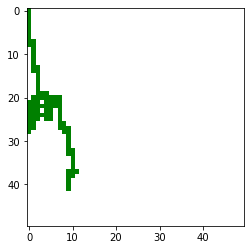

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9)]
neighbors [(41, 8), (41, 9), (41, 10), (42, 8), (42, 9), (42, 10), (43, 8), (43, 9), (43, 10)]
current_node (42, 9)
[3, 1, 3, 3, 4

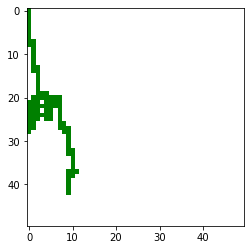

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9)]
neighbors [(42, 8), (42, 9), (42, 10), (43, 8), (43, 9), (43, 10), (44, 8), (44, 9), (44, 10)]
current_node (43, 9)
[3, 1

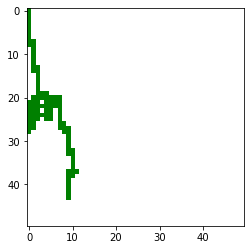

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9)]
neighbors [(43, 8), (43, 9), (43, 10), (44, 8), (44, 9), (44, 10), (45, 8), (45, 9), (45, 10)]
current_node (44,

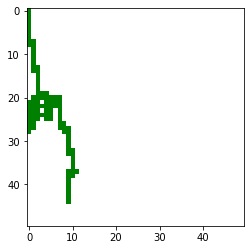

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9)]
neighbors [(44, 8), (44, 9), (44, 10), (45, 8), (45, 9), (45, 10), (46, 8), (46, 9), (46, 10)]
current_

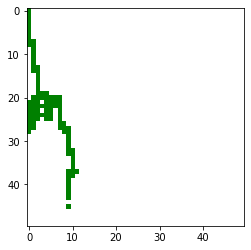

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9)]
neighbors [(43, 8), (43, 9), (43, 10), (44, 8), (44, 9), (44, 10), (45, 8), (45, 9), (45, 10)]

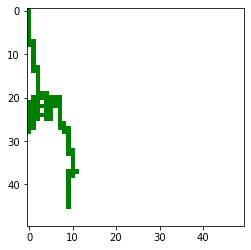

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9)]
neighbors [(43, 9), (43, 10), (43, 11), (44, 9), (44, 10), (44, 11), (45, 9), (45, 10), (45, 1

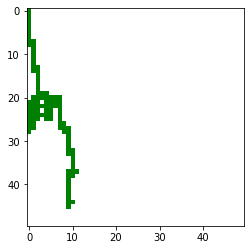

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10)]
neighbors [(44, 9), (44, 10), (44, 11), (45, 9), (45, 10), (45, 11), (46, 9), (46, 1

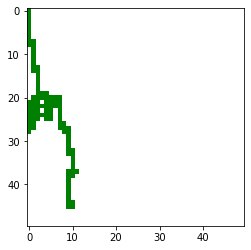

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10)]
neighbors [(45, 9), (45, 10), (45, 11), (46, 9), (46, 10), (46, 11), (47, 

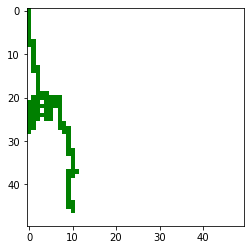

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10)]
neighbors [(46, 9), (46, 10), (46, 11), (47, 9), (47, 10), (47, 

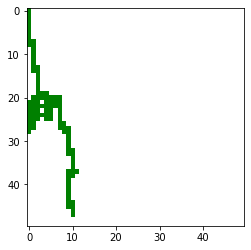

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10)]
neighbors [(47, 9), (47, 10), (47, 11), (48, 9), (48, 

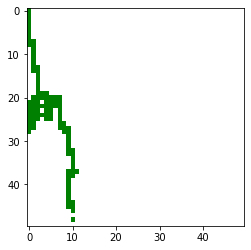

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10)]
neighbors [(46, 9), (46, 10), (46, 11), (47,

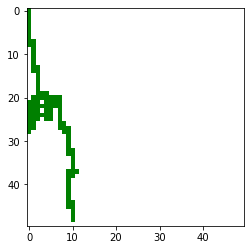

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10)]
neighbors [(46, 10), (46, 11), (46, 12), (47

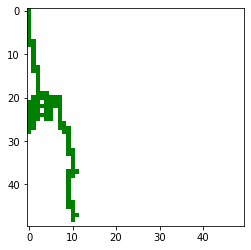

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11)]
neighbors [(47, 10), (47, 11), (47

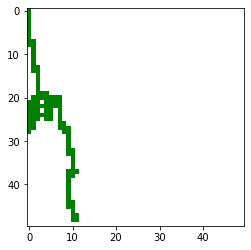

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11)]
neighbors [(48, 10), (48

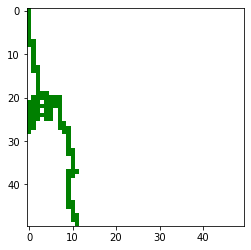

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11)]
neighbors [(48

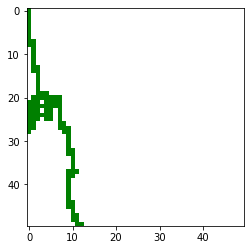

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12)]
neig

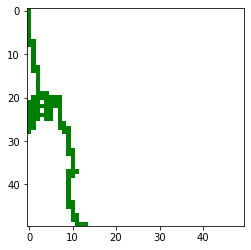

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

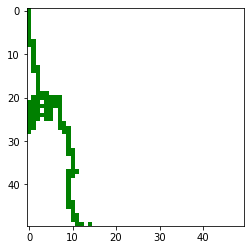

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

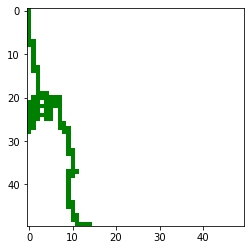

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

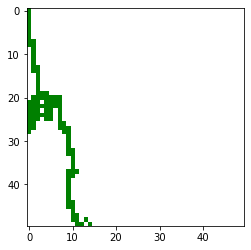

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

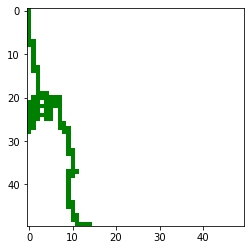

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

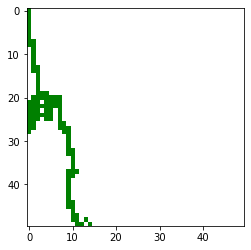

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

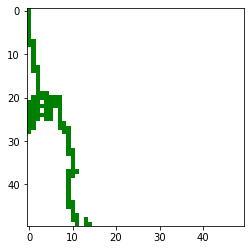

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

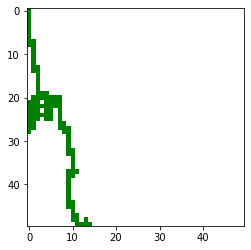

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

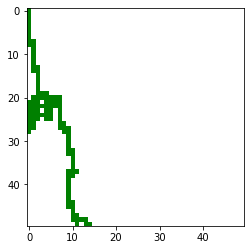

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

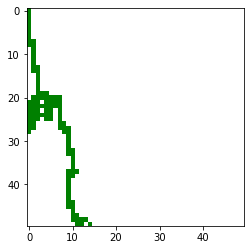

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

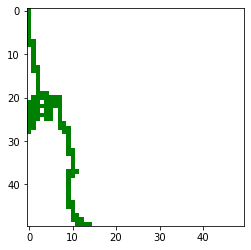

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

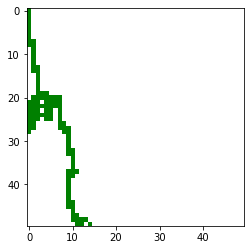

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

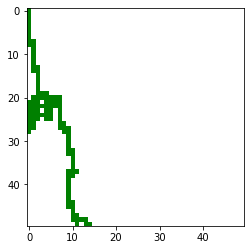

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

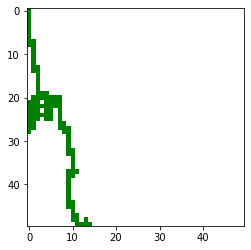

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

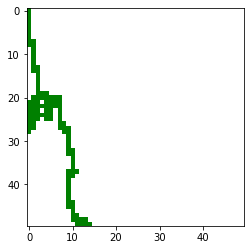

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

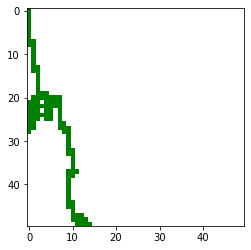

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

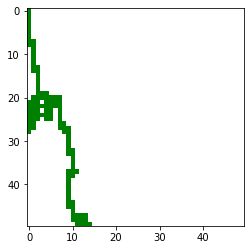

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

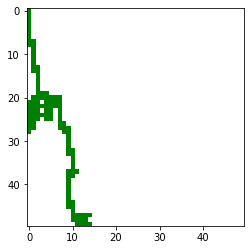

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

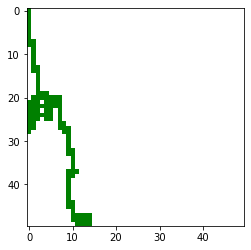

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

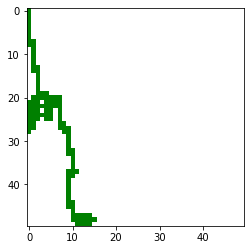

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

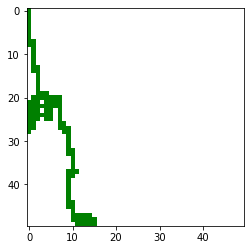

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

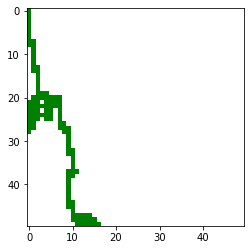

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

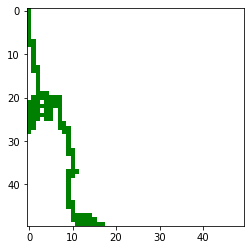

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

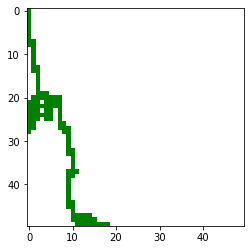

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

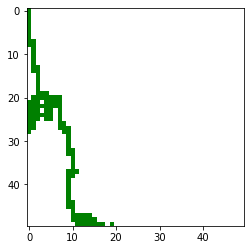

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

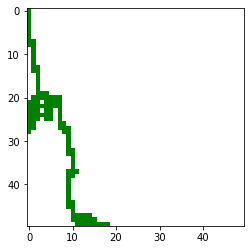

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

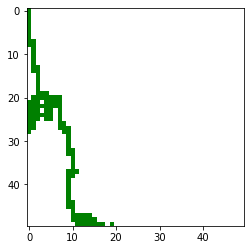

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

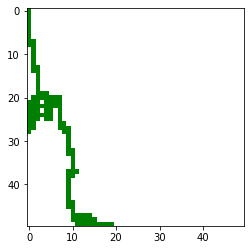

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

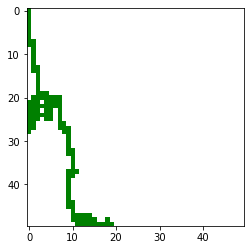

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

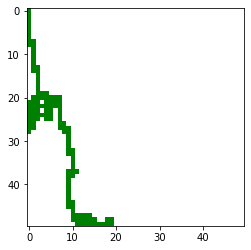

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

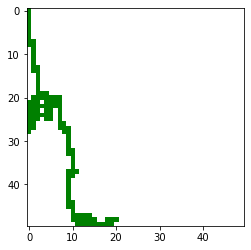

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

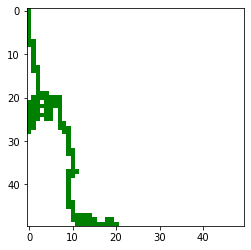

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

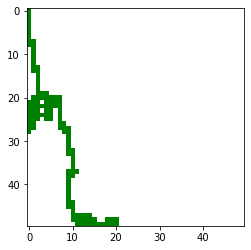

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

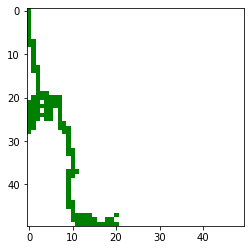

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

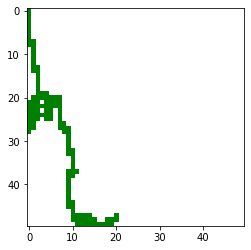

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

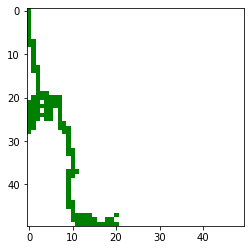

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

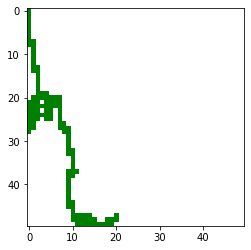

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

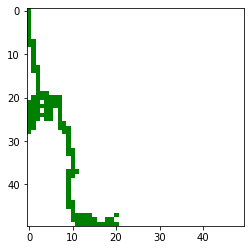

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

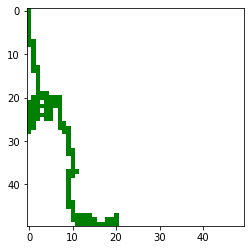

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

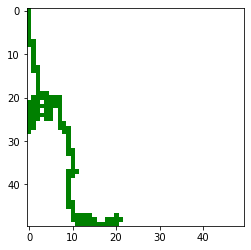

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

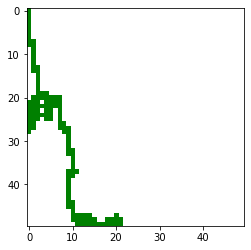

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

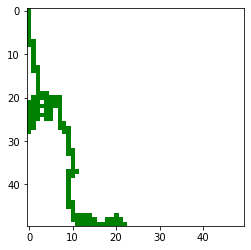

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

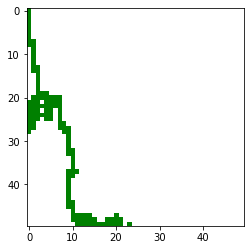

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

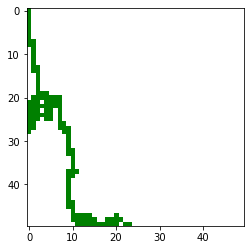

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

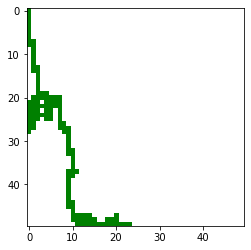

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

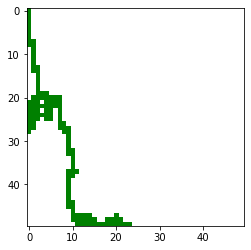

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

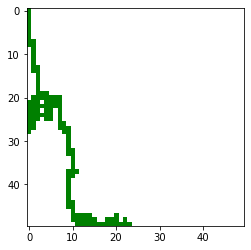

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

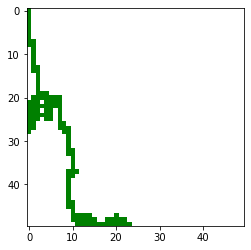

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

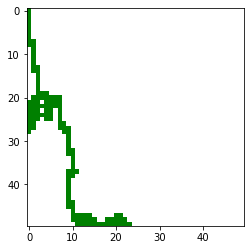

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

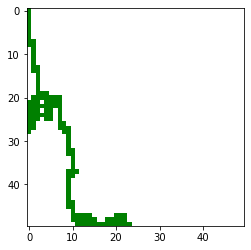

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

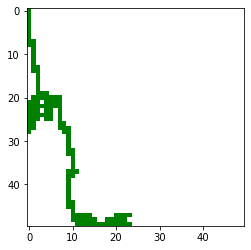

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

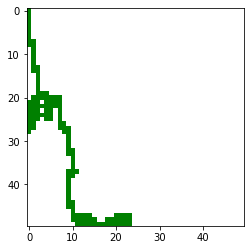

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

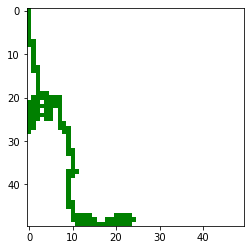

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

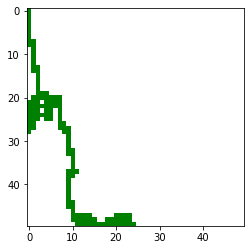

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

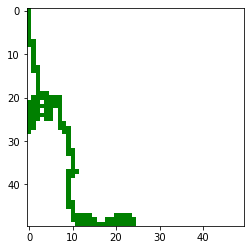

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

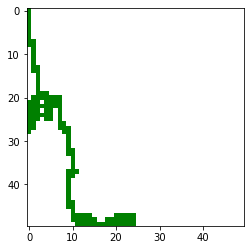

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

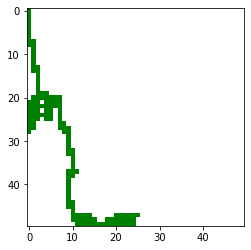

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

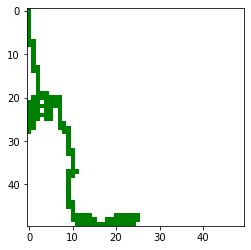

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

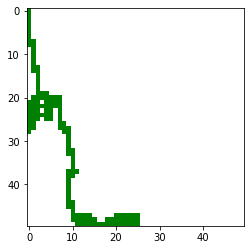

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

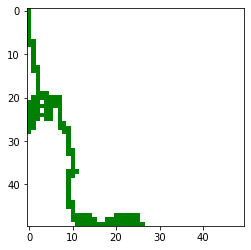

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

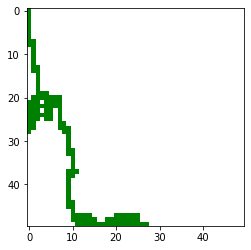

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

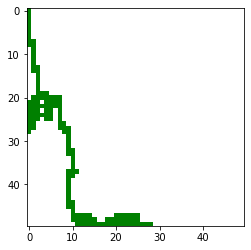

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

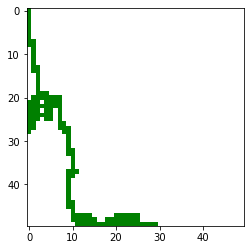

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

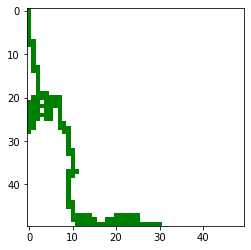

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

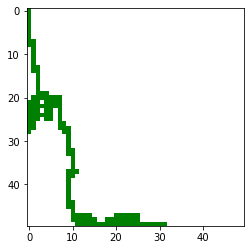

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

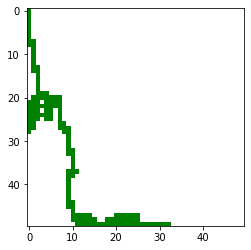

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

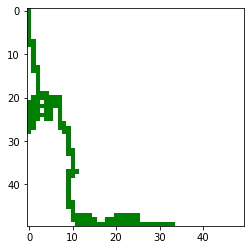

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

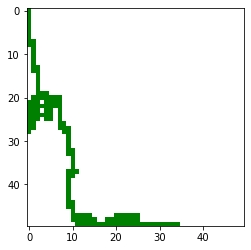

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

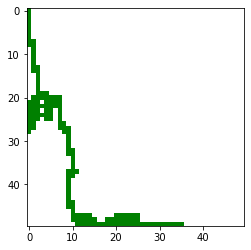

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

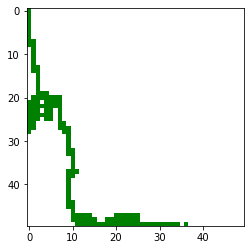

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

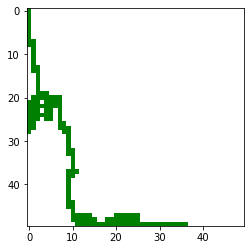

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

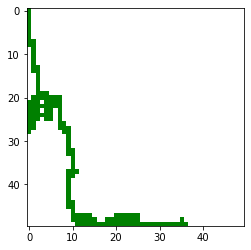

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

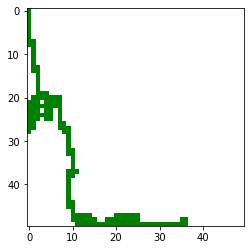

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

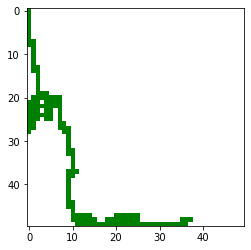

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

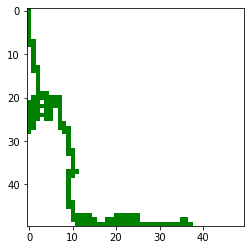

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

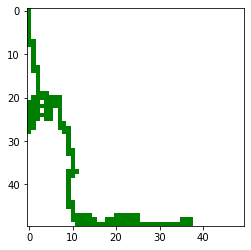

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

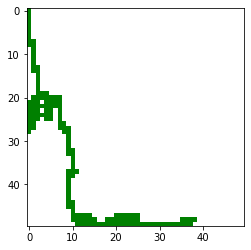

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

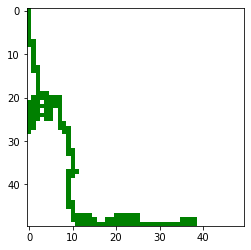

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

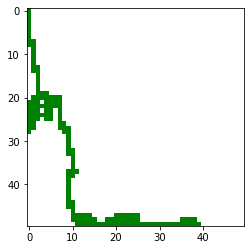

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

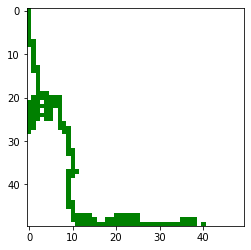

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

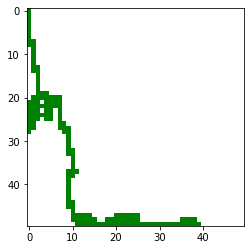

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

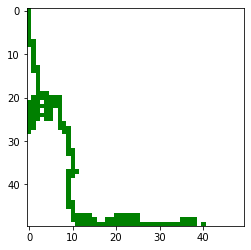

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

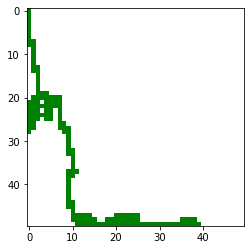

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

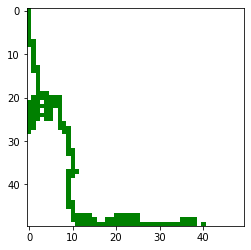

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

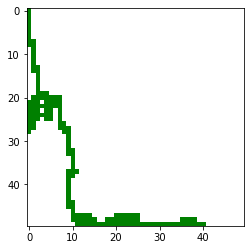

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

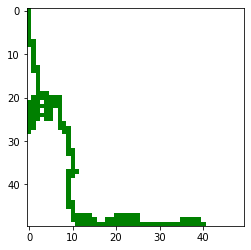

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

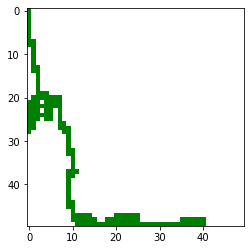

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

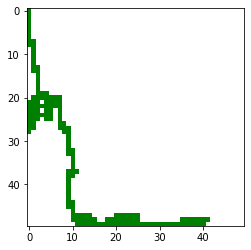

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

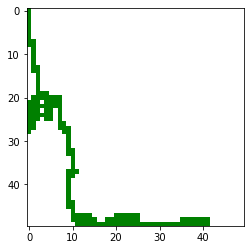

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

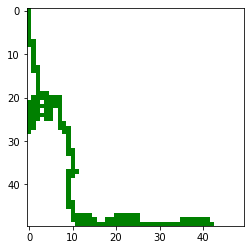

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

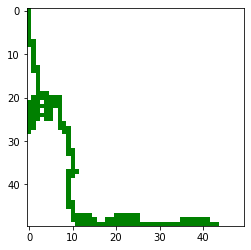

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

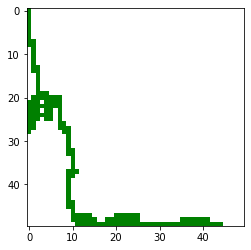

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

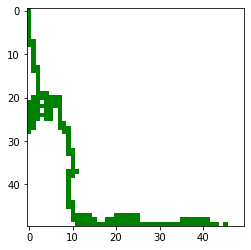

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

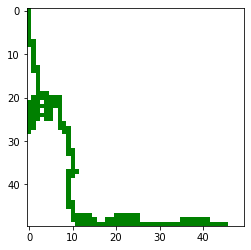

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

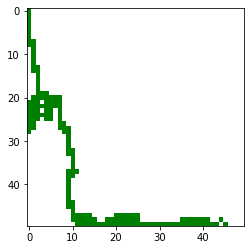

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

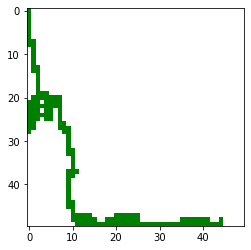

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

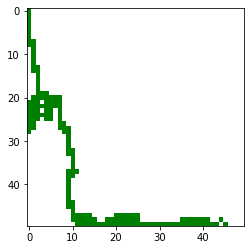

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

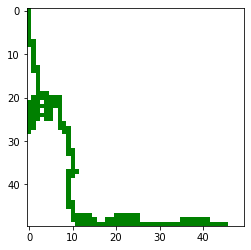

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

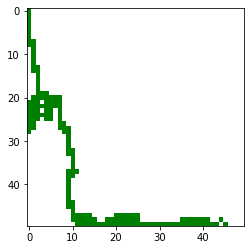

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

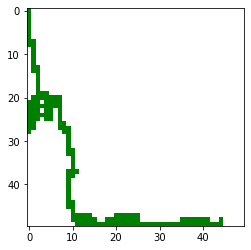

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

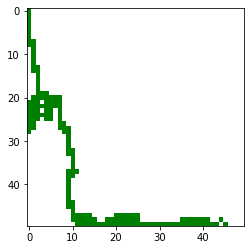

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

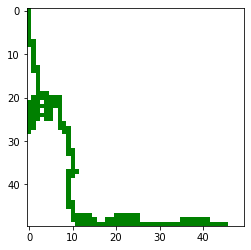

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

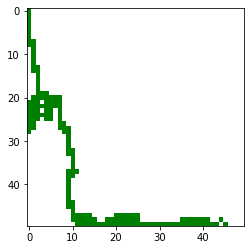

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

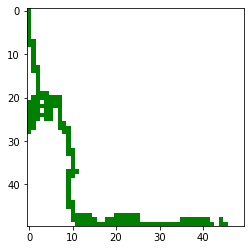

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

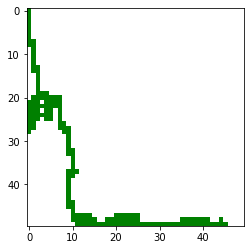

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

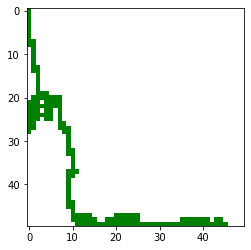

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

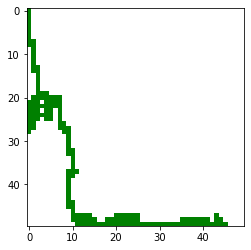

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

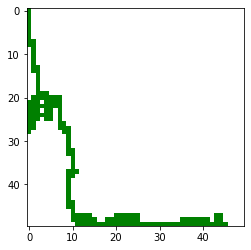

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

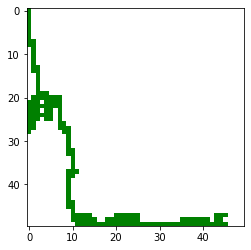

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

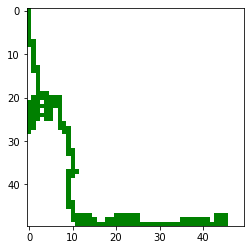

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

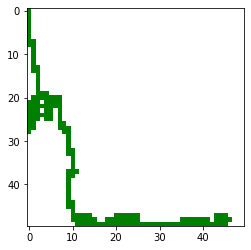

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

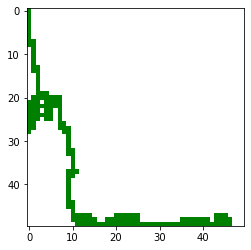

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

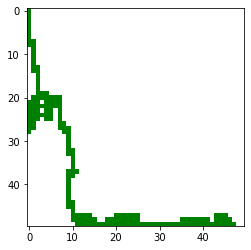

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

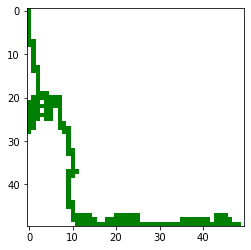

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (20, 3), (20, 1), (21, 1), (22, 1), (23, 1), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (27, 1), (26, 1), (25, 1), (25, 2), (24, 1), (24, 2), (24, 3), (23, 2), (22, 2), (22, 3), (19, 3), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (24, 5), (25, 5), (23, 5), (22, 5), (21, 5), (21, 6), (22, 6), (20, 5), (20, 6), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (27, 7), (26, 8), (27, 8), (28, 8), (27, 9), (28, 9), (29, 9), (30, 9), (31, 9), (32, 9), (33, 9), (32, 10), (33, 10), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (37, 11), (37, 9), (38, 9), (39, 9), (40, 9), (41, 9), (42, 9), (43, 9), (44, 9), (45, 9), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (47, 11), (48, 11), (49, 11), (49, 12), (49,

182

In [22]:
goal_reached = False
new_model = tf.keras.models.load_model('epic_num_reader2.model')

start = (0,0)
goal = (maze_size-1, maze_size-1)
agent_grid_world.itemset(start, 4)
current_node = start
visited_list = []
trajectory = []

while goal_reached == False:
    trajectory.append(current_node)
    if current_node == goal:
        agent_grid_world.itemset(goal, 1)
        print('Goal reached!!!')
        goal_reached = True
        break

    if current_node not in visited_list:
        visited_list.append(current_node)

    x_test = get_window(current_node, agent_grid_world, full_grid_world)
    x_test = np.asarray(x_test)

    predictions = new_model.predict(np.asarray([x_test]))

    if full_grid_world.item(current_node) == 1:
        
        agent_grid_world.itemset(current_node, 2)
        flag = 'blocked'
    else:
        agent_grid_world.itemset(current_node, 1)
        flag = 'free'
    
    if flag == 'free':
        try:
            next_node, message = next_move(current_node, predictions, full_grid_world, visited_list, maze_size, trajectory, flag, agent_grid_world)
            current_node = next_node
        except Exception as err:
            print(err)
            print('No path to goal')
            break
        print('next_node out',next_node)
        print('message', message)
        if message == "Can't reach goal":
            print('Cannot reach goal')
            break

    if flag == 'blocked':
        current_node = trajectory[-2]
        print('next node:::: ', current_node)

    agent_grid_world.itemset(current_node, 4)

    colormap = colors.ListedColormap(["green","white"])
    plt.imshow(agent_grid_world, cmap=colormap)
    plt.show()
    print(visited_list)
print(len(trajectory))


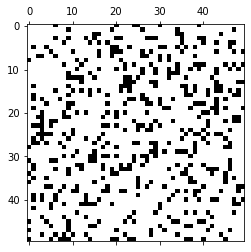

In [23]:
plt.spy(full_grid_world)

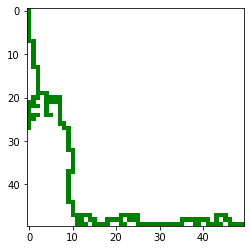

In [24]:
colormap = colors.ListedColormap(["green","white"])
plt.imshow(agent_grid_world, cmap=colormap)
plt.show()

In [27]:
print("The length of trajectory", len(trajectory))

The length of trajectory 489
